In [7]:
# from jupyterthemes import jtplot
# jtplot.style(theme='gruvboxd', context='notebook', ticks=True, grid=False)

In [161]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy.polynomial.polynomial import polyfit
import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import xarray as xr
from scipy import stats

In [ ]:
plt.rcParams['figure.facecolor']='white'
plt.rcParams['axes.facecolor']='white'

In [2]:
ds_free = xr.open_dataset('../Data/hycom_free_sst.nc')
ds_free = ds_free.sel(time=slice('2009-01-01','2014-06-04'))

ds_cci = xr.open_dataset('../Data/hycom_cci_sst.nc')
ds_cci = ds_cci.sel(time=slice('2009-01-01','2014-06-04'))

ds_sst = xr.open_dataset('../Data/cci_sst.nc')
ds_sst = ds_sst.sel(time=slice('2009-01-01','2014-06-04'))
ds_sst['analysed_sst'] = ds_sst['analysed_sst'] - 273.15

# ds_modis = xr.open_dataset('../Data/modis_aqua_l3_regional.nc')

# diff = ds_cci - ds_free

In [56]:
# testing regridded CCI SSTs

ds_sst = xr.open_dataset('../Data/cci_con_regrid.nc')
ds_sst = ds_sst.sel(time=slice('2009-01-01','2014-06-04'))
ds_sst['analysed_sst'] = ds_sst['analysed_sst'] - 273.15

ds_sst['latitude'] = ds_cci['latitude']
ds_sst['longitude'] = ds_cci['longitude']

# Timeseries

In [3]:
# the following lines are to remove the CCI SST missing days from the model outputs

ds_free_cut_temp1 = ds_free.sel(time=slice('2009-01-01','2011-03-18'))
ds_free_cut_temp2 = ds_free.sel(time=slice('2011-03-24','2014-06-04'))
ds_free_cut = ds_free_cut_temp1.merge(ds_free_cut_temp2)

ds_free_cut_temp1.close()
ds_free_cut_temp2.close()

ds_cci_cut_temp1 = ds_cci.sel(time=slice('2009-01-01','2011-03-18'))
ds_cci_cut_temp2 = ds_cci.sel(time=slice('2011-03-24','2014-06-04'))
ds_cci_cut = ds_cci_cut_temp1.merge(ds_cci_cut_temp2)

ds_cci_cut_temp1.close()
ds_cci_cut_temp2.close()


In [ ]:
aba_free_clima = aba_free.groupby('time.month').mean('time')
aba_free_deseasoned = aba_free.groupby('time.month') - aba_free_clima

aba_cci_clima = aba_cci.groupby('time.month').mean('time')
aba_cci_deseasoned = aba_cci.groupby('time.month') - aba_cci_clima

aba_sst_clima = aba_sst.groupby('time.month').mean('time')
aba_sst_deseasoned = aba_sst.groupby('time.month') - aba_sst_clima

In [11]:
# Benguela region
#=====================================================================================================================================

# Hondeklip bay inshore
hon_in_free = ds_free_cut.sel(latitude=slice(-30.35,-30.21),longitude=slice(16.95,17.18)).mean(dim=('longitude','latitude'), skipna=True)
hon_in_free_clima = hon_in_free.groupby('time.month').mean('time')
hon_in_free_deseasoned = hon_in_free.groupby('time.month') - hon_in_free_clima
hon_in_cci = ds_cci_cut.sel(latitude=slice(-30.35,-30.21),longitude=slice(16.95,17.18)).mean(dim=('longitude','latitude'), skipna=True)
hon_in_cci_clima = hon_in_cci.groupby('time.month').mean('time')
hon_in_cci_deseasoned = hon_in_cci.groupby('time.month') - hon_in_cci_clima
hon_in_sst = ds_sst.sel(lat=slice(-30.35,-30.21),lon=slice(16.95,17.18)).mean(dim=('lon','lat'), skipna=True)
hon_in_sst_clima = hon_in_sst.groupby('time.month').mean('time')
hon_in_sst_deseasoned = hon_in_sst.groupby('time.month') - hon_in_sst_clima

hon_in_free_std = ds_free_cut.sel(latitude=slice(-30.35,-30.21),longitude=slice(16.95,17.18)).std(dim=('longitude','latitude'))
hon_in_cci_std = ds_cci_cut.sel(latitude=slice(-30.35,-30.21),longitude=slice(16.95,17.18)).std(dim=('longitude','latitude'))
hon_in_sst_std = ds_sst.sel(lat=slice(-30.35,-30.21),lon=slice(16.95,17.18)).std(dim=('lon','lat'))

# Hondeklip bay offshore
hon_off_free = ds_free_cut.sel(latitude=slice(-30.35,-30.21),longitude=slice(13.54,13.77)).mean(dim=('longitude','latitude'), skipna=True)
hon_off_free_clima = hon_off_free.groupby('time.month').mean('time')
hon_off_free_deseasoned = hon_off_free.groupby('time.month') - hon_off_free_clima
hon_off_cci = ds_cci_cut.sel(latitude=slice(-30.35,-30.21),longitude=slice(13.54,13.77)).mean(dim=('longitude','latitude'), skipna=True)
hon_off_cci_clima = hon_off_cci.groupby('time.month').mean('time')
hon_off_cci_deseasoned = hon_off_cci.groupby('time.month') - hon_off_cci_clima
hon_off_sst = ds_sst.sel(lat=slice(-30.35,-30.21),lon=slice(13.54,13.77)).mean(dim=('lon','lat'), skipna=True)
hon_off_sst_clima = hon_off_sst.groupby('time.month').mean('time')
hon_off_sst_deseasoned = hon_off_sst.groupby('time.month') - hon_off_sst_clima

hon_off_free_std = ds_free_cut.sel(latitude=slice(-30.35,-30.21),longitude=slice(13.54,13.77)).std(dim=('longitude','latitude'))
hon_off_cci_std = ds_cci_cut.sel(latitude=slice(-30.35,-30.21),longitude=slice(13.54,13.77)).std(dim=('longitude','latitude'))
hon_off_sst_std = ds_sst.sel(lat=slice(-30.35,-30.21),lon=slice(13.54,13.77)).std(dim=('lon','lat'))

# Swakopmund inshore
swa_in_free = ds_free_cut.sel(latitude=slice(-22.59,-22.45),longitude=slice(14.00,14.23)).mean(dim=('longitude','latitude'), skipna=True)
swa_in_free_clima = swa_in_free.groupby('time.month').mean('time')
swa_in_free_deseasoned = swa_in_free.groupby('time.month') - swa_in_free_clima
swa_in_cci = ds_cci_cut.sel(latitude=slice(-22.59,-22.45),longitude=slice(14.00,14.23)).mean(dim=('longitude','latitude'), skipna=True)
swa_in_cci_clima = swa_in_cci.groupby('time.month').mean('time')
swa_in_cci_deseasoned = swa_in_cci.groupby('time.month') - swa_in_cci_clima
swa_in_sst = ds_sst.sel(lat=slice(-22.59,-22.45),lon=slice(14.00,14.23)).mean(dim=('lon','lat'), skipna=True)
swa_in_sst_clima = swa_in_sst.groupby('time.month').mean('time')
swa_in_sst_deseasoned = swa_in_sst.groupby('time.month') - swa_in_sst_clima

swa_in_free_std = ds_free_cut.sel(latitude=slice(-22.59,-22.45),longitude=slice(14.00,14.23)).std(dim=('longitude','latitude'))
swa_in_cci_std = ds_cci_cut.sel(latitude=slice(-22.59,-22.45),longitude=slice(14.00,14.23)).std(dim=('longitude','latitude'))
swa_in_sst_std = ds_sst.sel(lat=slice(-22.59,-22.45),lon=slice(14.00,14.23)).std(dim=('lon','lat'))

# Swakopmund offshore
swa_off_free = ds_free_cut.sel(latitude=slice(-22.59,-22.45),longitude=slice(10.39,10.62)).mean(dim=('longitude','latitude'), skipna=True)
swa_off_free_clima = swa_off_free.groupby('time.month').mean('time')
swa_off_free_deseasoned = swa_off_free.groupby('time.month') - swa_off_free_clima
swa_off_cci = ds_cci_cut.sel(latitude=slice(-22.59,-22.45),longitude=slice(10.39,10.62)).mean(dim=('longitude','latitude'), skipna=True)
swa_off_cci_clima = swa_off_cci.groupby('time.month').mean('time')
swa_off_cci_deseasoned = swa_off_cci.groupby('time.month') - swa_off_cci_clima
swa_off_sst = ds_sst.sel(lat=slice(-22.59,-22.45),lon=slice(10.39,10.62)).mean(dim=('lon','lat'), skipna=True)
swa_off_sst_clima = swa_off_sst.groupby('time.month').mean('time')
swa_off_sst_deseasoned = swa_off_sst.groupby('time.month') - swa_off_sst_clima

swa_off_free_std = ds_free_cut.sel(latitude=slice(-22.59,-22.45),longitude=slice(10.39,10.62)).std(dim=('longitude','latitude'))
swa_off_cci_std = ds_cci_cut.sel(latitude=slice(-22.59,-22.45),longitude=slice(10.39,10.62)).std(dim=('longitude','latitude'))
swa_off_sst_std = ds_sst.sel(lat=slice(-22.59,-22.45),lon=slice(10.39,10.62)).std(dim=('lon','lat'), skipna=True)

# Luderitz cell
lud_in_free = ds_free_cut.sel(latitude=slice(-26.64,-26.50),longitude=slice(14.70,14.93)).mean(dim=('longitude','latitude'), skipna=True)
lud_in_free_clima = lud_in_free.groupby('time.month').mean('time')
lud_in_free_deseasoned = lud_in_free.groupby('time.month') - lud_in_free_clima
lud_in_cci = ds_cci_cut.sel(latitude=slice(-26.64,-26.50),longitude=slice(14.70,14.93)).mean(dim=('longitude','latitude'), skipna=True)
lud_in_cci_clima = lud_in_cci.groupby('time.month').mean('time')
lud_in_cci_deseasoned = lud_in_cci.groupby('time.month') - lud_in_cci_clima
lud_in_sst = ds_sst.sel(lat=slice(-26.64,-26.50),lon=slice(14.70,14.93)).mean(dim=('lon','lat'), skipna=True)
lud_in_sst_clima = lud_in_sst.groupby('time.month').mean('time')
lud_in_sst_deseasoned = lud_in_sst.groupby('time.month') - lud_in_sst_clima

lud_in_free_std = ds_free_cut.sel(latitude=slice(-26.64,-26.50),longitude=slice(14.70,14.93)).std(dim=('longitude','latitude'), skipna=True)
lud_in_cci_std = ds_cci_cut.sel(latitude=slice(-26.64,-26.50),longitude=slice(14.70,14.93)).std(dim=('longitude','latitude'), skipna=True)
lud_in_sst_std = ds_sst.sel(lat=slice(-26.64,-26.50),lon=slice(14.70,14.93)).std(dim=('lon','lat'), skipna=True)


# Agulhas region
#=====================================================================================================================================

# Port Shepstone current core
ps_free = ds_free_cut.sel(latitude=slice(-31.23,-30.09),longitude=slice(30.39,30.62)).mean(dim=('longitude','latitude'), skipna=True)
ps_free_clima = ps_free.groupby('time.month').mean('time')
ps_free_deseasoned = ps_free.groupby('time.month') - ps_free_clima
ps_cci = ds_cci_cut.sel(latitude=slice(-31.23,-30.09),longitude=slice(30.39,30.62)).mean(dim=('longitude','latitude'), skipna=True)
ps_cci_clima = ps_cci.groupby('time.month').mean('time')
ps_cci_deseasoned = ps_cci.groupby('time.month') - ps_cci_clima
ps_sst = ds_sst.sel(lat=slice(-31.23,-30.09),lon=slice(30.39,30.62)).mean(dim=('lon','lat'), skipna=True)
ps_sst_clima = ps_sst.groupby('time.month').mean('time')
ps_sst_deseasoned = ps_sst.groupby('time.month') - ps_sst_clima

ps_free_std = ds_free_cut.sel(latitude=slice(-31.23,-30.09),longitude=slice(30.39,30.62)).std(dim=('longitude','latitude'), skipna=True)
ps_cci_std = ds_cci_cut.sel(latitude=slice(-31.23,-30.09),longitude=slice(30.39,30.62)).std(dim=('longitude','latitude'), skipna=True)
ps_sst_std = ds_sst.sel(lat=slice(-31.23,-30.09),lon=slice(30.39,30.62)).std(dim=('lon','lat'), skipna=True)
                                                                               
# Port Elizabeth current core
pe_free = ds_free_cut.sel(latitude=slice(-34.63,-34.49),longitude=slice(25.77,26.00)).mean(dim=('longitude','latitude'), skipna=True)
pe_free_clima = pe_free.groupby('time.month').mean('time')
pe_free_deseasoned = pe_free.groupby('time.month') - pe_free_clima
pe_cci = ds_cci_cut.sel(latitude=slice(-34.63,-34.49),longitude=slice(25.77,26.00)).mean(dim=('longitude','latitude'), skipna=True)
pe_cci_clima = pe_cci.groupby('time.month').mean('time')
pe_cci_deseasoned = pe_cci.groupby('time.month') - pe_cci_clima
pe_sst = ds_sst.sel(lat=slice(-34.63,-34.49),lon=slice(25.77,26.00)).mean(dim=('lon','lat'), skipna=True)
pe_sst_clima = pe_sst.groupby('time.month').mean('time')
pe_sst_deseasoned = pe_sst.groupby('time.month') - pe_sst_clima

pe_free_std = ds_free_cut.sel(latitude=slice(-34.63,-34.49),longitude=slice(25.77,26.00)).std(dim=('longitude','latitude'), skipna=True)
pe_cci_std = ds_cci_cut.sel(latitude=slice(-34.63,-34.49),longitude=slice(25.77,26.00)).std(dim=('longitude','latitude'), skipna=True)
pe_sst_std = ds_sst.sel(lat=slice(-34.63,-34.49),lon=slice(25.77,26.00)).std(dim=('lon','lat'), skipna=True)

# Retroflection
ret_free = ds_free_cut.sel(latitude=slice(-39.24,-39.10),longitude=slice(20.28,20.51)).mean(dim=('longitude','latitude'), skipna=True)
ret_free_clima = ret_free.groupby('time.month').mean('time')
ret_free_deseasoned = ret_free.groupby('time.month') - ret_free_clima
ret_cci = ds_cci_cut.sel(latitude=slice(-39.24,-39.10),longitude=slice(20.28,20.51)).mean(dim=('longitude','latitude'), skipna=True)
ret_cci_clima = ret_cci.groupby('time.month').mean('time')
ret_cci_deseasoned = ret_cci.groupby('time.month') - ret_cci_clima
ret_sst = ds_sst.sel(lat=slice(-39.24,-39.10),lon=slice(20.28,20.51)).mean(dim=('lon','lat'), skipna=True)
ret_sst_clima = ret_sst.groupby('time.month').mean('time')
ret_sst_deseasoned = ret_sst.groupby('time.month') - ret_sst_clima

ret_free_std = ds_free_cut.sel(latitude=slice(-39.24,-39.10),longitude=slice(20.28,20.51)).std(dim=('longitude','latitude'), skipna=True)
ret_cci_std = ds_cci_cut.sel(latitude=slice(-39.24,-39.10),longitude=slice(20.28,20.51)).std(dim=('longitude','latitude'), skipna=True)
ret_sst_std = ds_sst.sel(lat=slice(-39.24,-39.10),lon=slice(20.28,20.51)).std(dim=('lon','lat'), skipna=True)
                                                                               
# Agulhas Plateau loop
apl_free = ds_free_cut.sel(latitude=slice(-38.31,-38.17),longitude=slice(26.27,26.50)).mean(dim=('longitude','latitude'), skipna=True)
apl_free_clima = apl_free.groupby('time.month').mean('time')
apl_free_deseasoned = apl_free.groupby('time.month') - apl_free_clima
apl_cci = ds_cci_cut.sel(latitude=slice(-38.31,-38.17),longitude=slice(26.27,26.50)).mean(dim=('longitude','latitude'), skipna=True)
apl_cci_clima = apl_cci.groupby('time.month').mean('time')
apl_cci_deseasoned = apl_cci.groupby('time.month') - apl_cci_clima
apl_sst = ds_sst.sel(lat=slice(-38.31,-38.17),lon=slice(26.27,26.50)).mean(dim=('lon','lat'), skipna=True)
apl_sst_clima = apl_sst.groupby('time.month').mean('time')
apl_sst_deseasoned = apl_sst.groupby('time.month') - apl_sst_clima

apl_free_std = ds_free_cut.sel(latitude=slice(-38.31,-38.17),longitude=slice(26.27,26.50)).std(dim=('longitude','latitude'), skipna=True)
apl_cci_std = ds_cci_cut.sel(latitude=slice(-38.31,-38.17),longitude=slice(26.27,26.50)).std(dim=('longitude','latitude'), skipna=True)
apl_sst_std = ds_sst.sel(lat=slice(-38.31,-38.17),lon=slice(26.27,26.50)).std(dim=('lon','lat'), skipna=True)
                                                                               
# Agulhas Bank
aba_free = ds_free_cut.sel(latitude=slice(-35.21,-35.07),longitude=slice(21.05,21.28)).mean(dim=('longitude','latitude'), skipna=True)
aba_free_clima = aba_free.groupby('time.month').mean('time')
aba_free_deseasoned = aba_free.groupby('time.month') - aba_free_clima
aba_cci = ds_cci_cut.sel(latitude=slice(-35.21,-35.07),longitude=slice(21.05,21.28)).mean(dim=('longitude','latitude'), skipna=True)
aba_cci_clima = aba_cci.groupby('time.month').mean('time')
aba_cci_deseasoned = aba_cci.groupby('time.month') - aba_cci_clima
aba_sst = ds_sst.sel(lat=slice(-35.21,-35.07),lon=slice(21.05,21.28)).mean(dim=('lon','lat'), skipna=True)
aba_sst_clima = aba_sst.groupby('time.month').mean('time')
aba_sst_deseasoned = aba_sst.groupby('time.month') - aba_sst_clima

aba_free_std = ds_free_cut.sel(latitude=slice(-35.21,-35.07),longitude=slice(21.05,21.28)).std(dim=('longitude','latitude'), skipna=True)
aba_cci_std = ds_cci_cut.sel(latitude=slice(-35.21,-35.07),longitude=slice(21.05,21.28)).std(dim=('longitude','latitude'), skipna=True)
aba_sst_std = ds_sst.sel(lat=slice(-35.21,-35.07),lon=slice(21.05,21.28)).std(dim=('lon','lat'), skipna=True)
                                                                               

## Time series locations

### Benguela region

/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


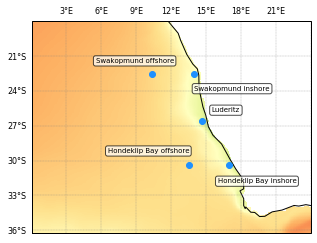

<Figure size 432x288 with 0 Axes>

In [10]:
proj = ccrs.PlateCarree()

plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
ax.coastlines()
ax.set_extent((5, 20, -36, -12))
ax.set_extent((0, 24, -36, -18))

# gridline work
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
gl.xlabels_top = True
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

### plotting timeseries locations ##########################################################################
# Hondeklip Bay inshore
ax.plot(16.95, -30.35, color='dodgerblue', marker='o', markersize=6, transform=ccrs.PlateCarree())
ax.text(16.00, -31.95, 'Hondeklip Bay inshore', transform=ccrs.PlateCarree(), fontsize=7, bbox=dict(boxstyle="round", facecolor='white', alpha=0.7))

# Hondeklip Bay offshore
ax.plot(13.54, -30.35, color='dodgerblue', marker='o', markersize=6, transform=ccrs.PlateCarree())
ax.text(6.54, -29.35, 'Hondeklip Bay offshore', transform=ccrs.PlateCarree(), fontsize=7, bbox=dict(boxstyle="round", facecolor='white', alpha=0.7))

# Swakopmund inshore
ax.plot(14.00, -22.59, color='dodgerblue', marker='o', markersize=6, transform=ccrs.PlateCarree())
ax.text(14.00, -23.99, 'Swakopmund inshore', transform=ccrs.PlateCarree(), fontsize=7, bbox=dict(boxstyle="round", facecolor='white', alpha=0.7))

# Swakopmund offshore
ax.plot(10.39, -22.59, color='dodgerblue', marker='o', markersize=6, transform=ccrs.PlateCarree())
ax.text(5.50, -21.60, 'Swakopmund offshore', transform=ccrs.PlateCarree(), fontsize=7, bbox=dict(boxstyle="round", facecolor='white', alpha=0.7))

# Luderitz
ax.plot(14.70, -26.64, color='dodgerblue', marker='o', markersize=6, transform=ccrs.PlateCarree())
ax.text(15.50, -25.84, 'Luderitz', transform=ccrs.PlateCarree(), fontsize=7, bbox=dict(boxstyle="round", facecolor='white', alpha=0.7))


###########################################################################################################

img = ds_sst['analysed_sst'].mean('time').plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('Spectral_r'), add_colorbar=False)
# cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
# cbar.set_label('Velocity (cm.s$^{-1}$)', fontsize=9)
ax.set_title('')
plt.savefig('../Figures/reference/Benguela_locations_SST.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

### Agulhas region

/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


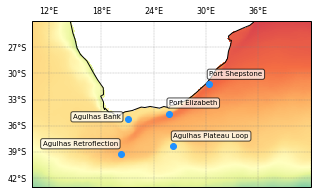

<Figure size 432x288 with 0 Axes>

In [33]:
proj = ccrs.PlateCarree()

plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
ax.coastlines()
ax.set_extent((10, 42, -42, -24))

# gridline work
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
gl.xlabels_top = True
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

### plotting timeseries locations ##########################################################################
# Port Shepstone current core
ax.plot(30.39, -31.23, color='dodgerblue', marker='o', markersize=6, transform=ccrs.PlateCarree())
ax.text(30.39, -30.33, 'Port Shepstone', transform=ccrs.PlateCarree(), fontsize=7, bbox=dict(boxstyle="round", facecolor='white', alpha=0.7))

# Port Elizabeth current core
ax.plot(25.77, -34.63, color='dodgerblue', marker='o', markersize=6, transform=ccrs.PlateCarree())
ax.text(25.77, -33.63, 'Port Elizabeth', transform=ccrs.PlateCarree(), fontsize=7, bbox=dict(boxstyle="round", facecolor='white', alpha=0.7))

# Agulhas Retroflection
ax.plot(20.28, -39.24, color='dodgerblue', marker='o', markersize=6, transform=ccrs.PlateCarree())
ax.text(11.28, -38.30, 'Agulhas Retroflection', transform=ccrs.PlateCarree(), fontsize=7, bbox=dict(boxstyle="round", facecolor='white', alpha=0.7))

# Agulhas Plateau Loop
ax.plot(26.27, -38.31, color='dodgerblue', marker='o', markersize=6, transform=ccrs.PlateCarree())
ax.text(26.27, -37.41, 'Agulhas Plateau Loop', transform=ccrs.PlateCarree(), fontsize=7, bbox=dict(boxstyle="round", facecolor='white', alpha=0.7))

# Agulhas Bank
ax.plot(21.05, -35.21, color='dodgerblue', marker='o', markersize=6, transform=ccrs.PlateCarree())
ax.text(14.75, -35.21, 'Agulhas Bank', transform=ccrs.PlateCarree(), fontsize=7, bbox=dict(boxstyle="round", facecolor='white', alpha=0.7))


###########################################################################################################

img = ds_sst['analysed_sst'].mean('time').plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('Spectral_r'), add_colorbar=False)
# cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
# cbar.set_label('Velocity (cm.s$^{-1}$)', fontsize=9)
ax.set_title('')
plt.savefig('../Figures/reference/Agulhas_locations_SST.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

## Benguela region

#### Sandbox:

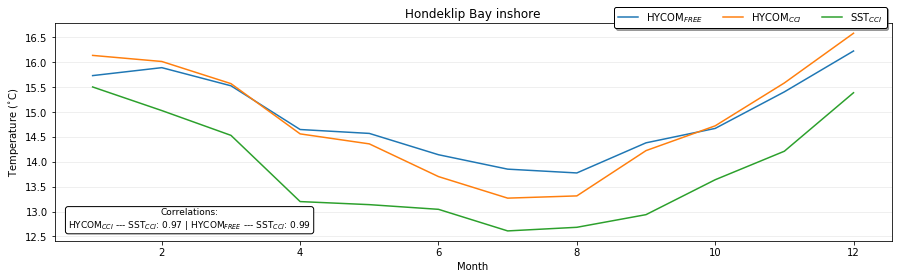

In [241]:
# # calculating correlations
mean_corr_ccisst = round(np.corrcoef(hon_in_cci_clima['temperature'][:,0],hon_in_sst_clima['analysed_sst'])[0,1],2)
mean_corr_ccifree = round(np.corrcoef(hon_in_cci_clima['temperature'][:,0],hon_in_free_clima['temperature'][:,0])[0,1],2)

fig = plt.figure(figsize=(15,4))
hon_in_free_clima['temperature'][:,0].plot.line(x='month',label='HYCOM$_{FREE}$')
hon_in_cci_clima['temperature'][:,0].plot.line(x='month',label='HYCOM$_{CCI}$')
hon_in_sst_clima['analysed_sst'].plot.line(x='month',label='SST$_{CCI}$')
plt.title('Hondeklip Bay inshore')
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Month')
plt.grid(axis='y', alpha=0.25)

# textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: {0} | HYCOM$_{FREE}$ --- SST$_{CCI}$: {0}'.format(mean_corr_ccifree,mean_corr_ccifree)
textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccifree)

plt.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.1), ncol=3, fancybox=True, shadow=True)
fig.text(0.25, 0.2, textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=fig.transFigure, bbox = dict(boxstyle='round', facecolor='white'))
plt.savefig('../Figures/sst/TimeSeries_Climatology_HondeklipIn.png', dpi=300, bbox_inches='tight', format='png')

plt.show()

In [222]:
hon_in_free_clima['temperature']

<xarray.DataArray 'temperature' (month: 12, depth: 1)>
array([[15.73019 ],
       [15.889786],
       [15.525636],
       [14.647285],
       [14.568976],
       [14.140823],
       [13.851156],
       [13.774909],
       [14.379841],
       [14.669432],
       [15.403613],
       [16.2246  ]], dtype=float32)
Coordinates:
  * depth    (depth) float32 0.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

#### True figures

### Hondeklip Bay inshore

#### Including seasonal signal

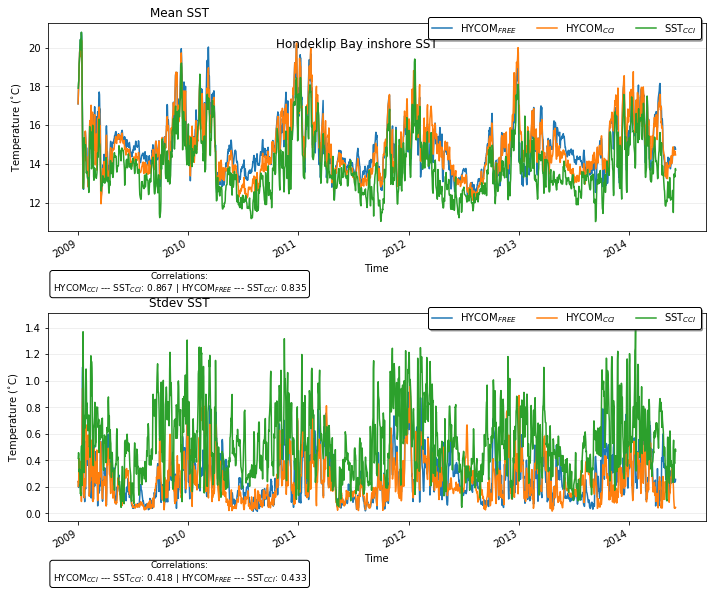

In [129]:
mean_corr_ccisst = round(np.corrcoef(hon_in_cci['temperature'][:,0],hon_in_sst['analysed_sst'])[0,1],3)
mean_corr_freesst = round(np.corrcoef(hon_in_free['temperature'][:,0],hon_in_sst['analysed_sst'])[0,1],3)

std_corr_ccisst = round(np.corrcoef(hon_in_cci_std['temperature'][:,0],hon_in_sst_std['analysed_sst'])[0,1],3)
std_corr_freesst = round(np.corrcoef(hon_in_free_std['temperature'][:,0],hon_in_sst_std['analysed_sst'])[0,1],3)

fig = plt.figure(figsize=(10,8.2))
fig.suptitle('Hondeklip Bay inshore SST', y=0.93)

########################################################################################################################################################################
### Subplot 1: Plotting mean
########################################################################################################################################################################

ax1 = plt.subplot(2,1,1)

hon_in_free['temperature'].plot.line(x='time',label='HYCOM$_{FREE}$')
hon_in_cci['temperature'].plot.line(x='time',label='HYCOM$_{CCI}$')
hon_in_sst['analysed_sst'].plot.line(x='time',label='SST$_{CCI}$')
plt.title('Mean SST', x=0.2)
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Time')
ax1.grid(axis='y', alpha=0.25)

ax1textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_freesst)

ax1.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.05), ncol=3, fancybox=True, shadow=True)
ax1.text(0.2, -0.25, ax1textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=ax1.transAxes, bbox = dict(boxstyle='round', facecolor='white'))

########################################################################################################################################################################
### Subplot 2: Plotting standard deviation
########################################################################################################################################################################

ax2 = plt.subplot(2,1,2)

hon_in_free_std['temperature'].plot.line(x='time',label='HYCOM$_{FREE}$')
hon_in_cci_std['temperature'].plot.line(x='time',label='HYCOM$_{CCI}$')
hon_in_sst_std['analysed_sst'].plot.line(x='time',label='SST$_{CCI}$')
plt.title('Stdev SST', x=0.2)
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Time')
ax2.grid(axis='y', alpha=0.25)

ax2textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(std_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(std_corr_freesst)

ax2.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.05), ncol=3, fancybox=True, shadow=True)
ax2.text(0.2, -0.25, ax2textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=ax2.transAxes, bbox = dict(boxstyle='round', facecolor='white'))

plt.subplots_adjust(hspace=0.6)

plt.savefig('../Figures/sst/TimeSeries_HondeklipIn.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

#### Climatology

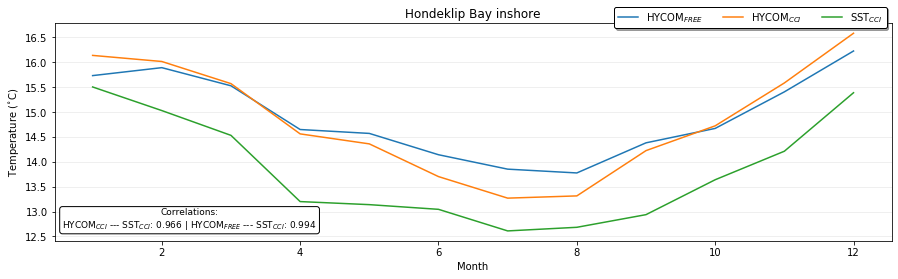

In [245]:
# # calculating correlations
mean_corr_ccisst = round(np.corrcoef(hon_in_cci_clima['temperature'][:,0],hon_in_sst_clima['analysed_sst'])[0,1],3)
mean_corr_ccifree = round(np.corrcoef(hon_in_cci_clima['temperature'][:,0],hon_in_free_clima['temperature'][:,0])[0,1],3)

fig = plt.figure(figsize=(15,4))
hon_in_free_clima['temperature'][:,0].plot.line(x='month',label='HYCOM$_{FREE}$')
hon_in_cci_clima['temperature'][:,0].plot.line(x='month',label='HYCOM$_{CCI}$')
hon_in_sst_clima['analysed_sst'].plot.line(x='month',label='SST$_{CCI}$')
plt.title('Hondeklip Bay inshore')
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Month')
plt.grid(axis='y', alpha=0.25)

# textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: {0} | HYCOM$_{FREE}$ --- SST$_{CCI}$: {0}'.format(mean_corr_ccifree,mean_corr_ccifree)
textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccifree)

plt.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.1), ncol=3, fancybox=True, shadow=True)
fig.text(0.25, 0.2, textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=fig.transFigure, bbox = dict(boxstyle='round', facecolor='white'))
plt.savefig('../Figures/sst/TimeSeries_Climatology_HondeklipIn.png', dpi=300, bbox_inches='tight', format='png')

plt.show()

#### De-seasonalised / Anomalies

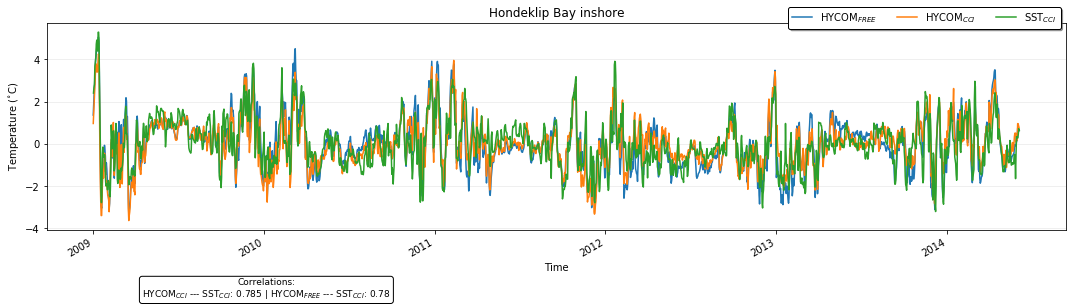

In [130]:
# calculating correlations
mean_corr_ccisst = round(np.corrcoef(hon_in_cci_deseasoned['temperature'][:,0],hon_in_sst_deseasoned['analysed_sst'])[0,1],3)
mean_corr_freesst = round(np.corrcoef(hon_in_free_deseasoned['temperature'][:,0],hon_in_sst_deseasoned['analysed_sst'])[0,1],3)

fig = plt.figure(figsize=(15,4))
hon_in_free_deseasoned['temperature'].plot.line(x='time',label='HYCOM$_{FREE}$')
hon_in_cci_deseasoned['temperature'].plot.line(x='time',label='HYCOM$_{CCI}$')
hon_in_sst_deseasoned['analysed_sst'].plot.line(x='time',label='SST$_{CCI}$')
plt.title('Hondeklip Bay inshore')
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Time')
plt.grid(axis='y', alpha=0.25)

textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_freesst)
fig.text(0.25, -0.02, textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=fig.transFigure, bbox = dict(boxstyle='round', facecolor='white'))
plt.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.1), ncol=3, fancybox=True, shadow=True)

plt.savefig('../Figures/sst/TimeSeries_HondeklipIn_deseasoned.png', dpi=300, bbox_inches='tight', format='png')

plt.plot()
plt.tight_layout()

#### De-seasonalised scatter plot

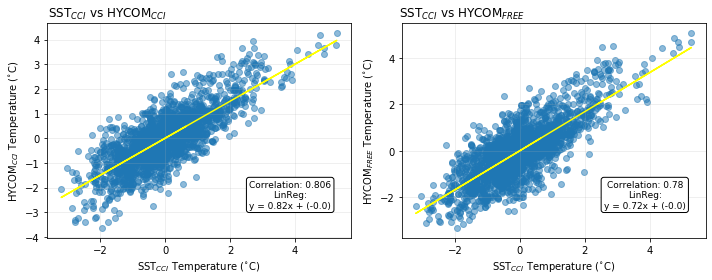

In [168]:
#_________________________________________________________________________________________________________________________________________
# calculating correlations and regressions

mean_corr_deseasoned_ccisst = round(np.corrcoef(hon_in_cci_deseasoned['temperature'][:,0],hon_in_sst_deseasoned['analysed_sst'])[0,1],2)
mean_corr_freesst = round(np.corrcoef(hon_in_free_deseasoned['temperature'][:,0],hon_in_sst_deseasoned['analysed_sst'])[0,1],2)

regress1 = stats.linregress(hon_in_cci_deseasoned['temperature'][:,0], hon_in_sst_deseasoned['analysed_sst'])
round(regress1.slope, 2)
round(regress1.intercept, 2)

regress2 = stats.linregress(hon_in_free_deseasoned['temperature'][:,0], hon_in_sst_deseasoned['analysed_sst'])
round(regress2.slope, 2)
round(regress2.intercept, 2)
#_________________________________________________________________________________________________________________________________________


fig = plt.figure(figsize=(10,4))
# fig.title('Hondeklip Bay inshore SST', y=0.93)

########################################################################################################################################################################
### Subplot 1: Plotting HYCOM_cci vs SST_cci
########################################################################################################################################################################

ax1 = plt.subplot(1,2,1)

b1, m1 = polyfit(hon_in_sst_deseasoned['analysed_sst'], hon_in_cci_deseasoned['temperature'], 1)

plt.scatter(hon_in_sst_deseasoned['analysed_sst'],hon_in_cci_deseasoned['temperature'], alpha=0.5)
plt.plot(hon_in_sst_deseasoned['analysed_sst'], b1 + m1 * hon_in_sst_deseasoned['analysed_sst'], '-', color='yellow')
plt.title('SST$_{CCI}$ vs HYCOM$_{CCI}$', x=0.2)
plt.xlabel('SST$_{CCI}$ Temperature ($^{\circ}$C)')
plt.ylabel('HYCOM$_{CCI}$ Temperature ($^{\circ}$C)')
ax1.grid(axis='both', alpha=0.25)

ax1textbox = 'Correlation: {0}'.format(mean_corr_ccisst) + '\nLinReg:\ny = {0}'.format(round(regress1.slope, 2)) + 'x + ({0})'.format(round(regress1.intercept, 2))
ax1.text(0.8, 0.2, ax1textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=ax1.transAxes, bbox = dict(boxstyle='round', facecolor='white'))

########################################################################################################################################################################
### Subplot 2: Plotting HYCOM_free vs SST_cci
########################################################################################################################################################################

ax2 = plt.subplot(1,2,2)

b2, m2 = polyfit(hon_in_sst_deseasoned['analysed_sst'], hon_in_free_deseasoned['temperature'], 1)

plt.scatter(hon_in_sst_deseasoned['analysed_sst'],hon_in_free_deseasoned['temperature'], alpha=0.5)
plt.plot(hon_in_sst_deseasoned['analysed_sst'], b2 + m2 * hon_in_sst_deseasoned['analysed_sst'], '-', color='yellow')
plt.title('SST$_{CCI}$ vs HYCOM$_{FREE}$', x=0.2)
plt.xlabel('SST$_{CCI}$ Temperature ($^{\circ}$C)')
plt.ylabel('HYCOM$_{FREE}$ Temperature ($^{\circ}$C)')
ax2.grid(axis='both', alpha=0.25)

ax2textbox = 'Correlation: {0}'.format(mean_corr_freesst) + '\nLinReg:\ny = {0}'.format(round(regress2.slope, 2)) + 'x + ({0})'.format(round(regress2.intercept, 2))
ax2.text(0.8, 0.2, ax2textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=ax2.transAxes, bbox = dict(boxstyle='round', facecolor='white'))

plt.subplots_adjust(hspace=0.6)

plt.savefig('../Figures/sst/Scatter_HondeklipIn.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

### Hondeklip Bay offshore

#### Including seasonal signal

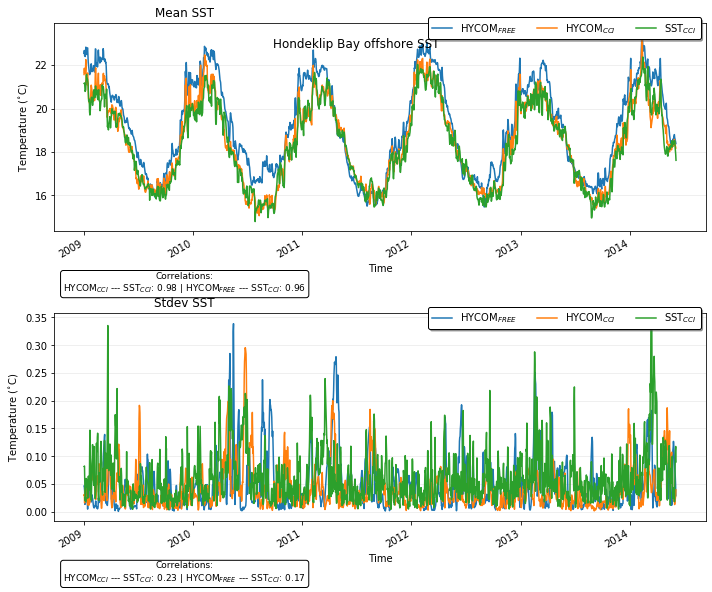

In [170]:
mean_corr_ccisst = round(np.corrcoef(hon_off_cci['temperature'][:,0],hon_off_sst['analysed_sst'])[0,1],2)
mean_corr_freesst = round(np.corrcoef(hon_off_free['temperature'][:,0],hon_off_sst['analysed_sst'])[0,1],2)

std_corr_ccisst = round(np.corrcoef(hon_off_cci_std['temperature'][:,0],hon_off_sst_std['analysed_sst'])[0,1],2)
std_corr_freesst = round(np.corrcoef(hon_off_free_std['temperature'][:,0],hon_off_sst_std['analysed_sst'])[0,1],2)

fig = plt.figure(figsize=(10,8.2))
fig.suptitle('Hondeklip Bay offshore SST', y=0.93)

########################################################################################################################################################################
### Subplot 1: Plotting mean
########################################################################################################################################################################

ax1 = plt.subplot(2,1,1)

hon_off_free['temperature'].plot.line(x='time',label='HYCOM$_{FREE}$')
hon_off_cci['temperature'].plot.line(x='time',label='HYCOM$_{CCI}$')
hon_off_sst['analysed_sst'].plot.line(x='time',label='SST$_{CCI}$')
plt.title('Mean SST', x=0.2)
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Time')
ax1.grid(axis='y', alpha=0.25)
ax1.set_aspect('auto')

ax1textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_freesst)

ax1.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.05), ncol=3, fancybox=True, shadow=True)
ax1.text(0.2, -0.25, ax1textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=ax1.transAxes, bbox = dict(boxstyle='round', facecolor='white'))

########################################################################################################################################################################
### Subplot 2: Plotting standard deviation
########################################################################################################################################################################

ax2 = plt.subplot(2,1,2)

hon_off_free_std['temperature'].plot.line(x='time',label='HYCOM$_{FREE}$')
hon_off_cci_std['temperature'].plot.line(x='time',label='HYCOM$_{CCI}$')
hon_off_sst_std['analysed_sst'].plot.line(x='time',label='SST$_{CCI}$')
plt.title('Stdev SST', x=0.2)
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Time')
ax2.grid(axis='y', alpha=0.25)
ax2.set_aspect('auto')

ax2textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(std_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(std_corr_freesst)

ax2.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.05), ncol=3, fancybox=True, shadow=True)
ax2.text(0.2, -0.25, ax2textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=ax2.transAxes, bbox = dict(boxstyle='round', facecolor='white'))

plt.subplots_adjust(hspace=0.6)

plt.savefig('../Figures/sst/TimeSeries_HondeklipOff.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

#### Climatology

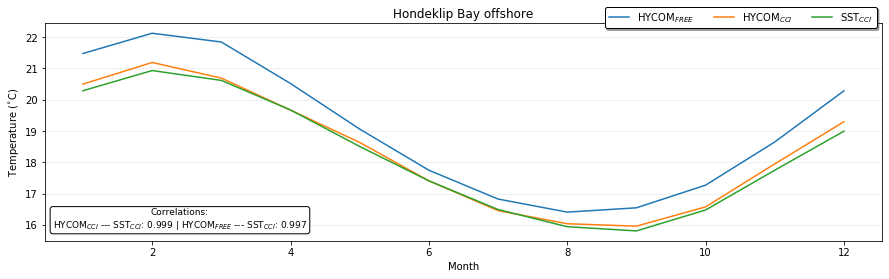

In [247]:
# # calculating correlations
mean_corr_ccisst = round(np.corrcoef(hon_off_cci_clima['temperature'][:,0],hon_off_sst_clima['analysed_sst'])[0,1],3)
mean_corr_ccifree = round(np.corrcoef(hon_off_cci_clima['temperature'][:,0],hon_off_free_clima['temperature'][:,0])[0,1],3)

fig = plt.figure(figsize=(15,4))
hon_off_free_clima['temperature'][:,0].plot.line(x='month',label='HYCOM$_{FREE}$')
hon_off_cci_clima['temperature'][:,0].plot.line(x='month',label='HYCOM$_{CCI}$')
hon_off_sst_clima['analysed_sst'].plot.line(x='month',label='SST$_{CCI}$')
plt.title('Hondeklip Bay offshore')
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Month')
plt.grid(axis='y', alpha=0.25)

# textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: {0} | HYCOM$_{FREE}$ --- SST$_{CCI}$: {0}'.format(mean_corr_ccifree,mean_corr_ccifree)
textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccifree)

plt.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.1), ncol=3, fancybox=True, shadow=True)
fig.text(0.25, 0.2, textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=fig.transFigure, bbox = dict(boxstyle='round', facecolor='white'))
plt.savefig('../Figures/sst/TimeSeries_Climatology_HondeklipOff.png', dpi=300, bbox_inches='tight', format='png')

plt.show()

#### De-seasonalised / Anomalies

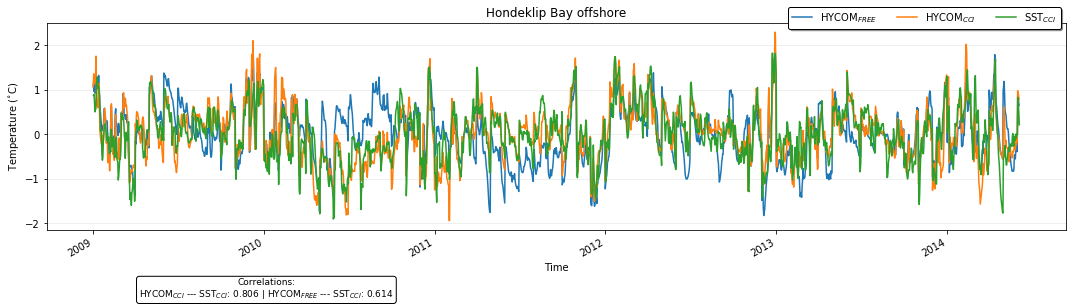

In [166]:
# calculating correlations
mean_corr_ccisst = round(np.corrcoef(hon_off_cci_deseasoned['temperature'][:,0],hon_off_sst_deseasoned['analysed_sst'])[0,1],3)
mean_corr_freesst = round(np.corrcoef(hon_off_free_deseasoned['temperature'][:,0],hon_off_sst_deseasoned['analysed_sst'])[0,1],3)

fig = plt.figure(figsize=(15,4))
hon_off_free_deseasoned['temperature'].plot.line(x='time',label='HYCOM$_{FREE}$')
hon_off_cci_deseasoned['temperature'].plot.line(x='time',label='HYCOM$_{CCI}$')
hon_off_sst_deseasoned['analysed_sst'].plot.line(x='time',label='SST$_{CCI}$')
plt.title('Hondeklip Bay offshore')
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Time')
plt.grid(axis='y', alpha=0.25)

textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_freesst)
fig.text(0.25, -0.02, textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=fig.transFigure, bbox = dict(boxstyle='round', facecolor='white'))
plt.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.1), ncol=3, fancybox=True, shadow=True)

plt.savefig('../Figures/sst/TimeSeries_HondeklipOff_deseasoned.png', dpi=300, bbox_inches='tight', format='png')

plt.plot()
plt.tight_layout()

#### De-seasonalised scatter plot

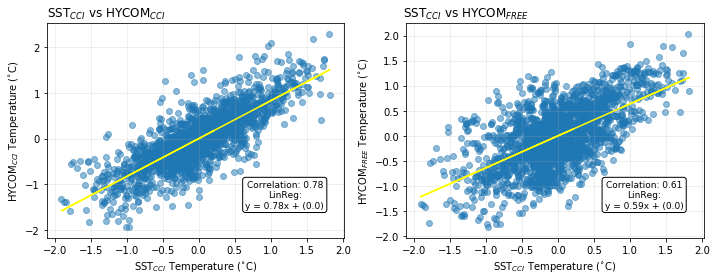

In [177]:
#_________________________________________________________________________________________________________________________________________
# calculating correlations and regressions

mean_corr_deseasoned_ccisst = round(np.corrcoef(hon_off_cci_deseasoned['temperature'][:,0],hon_off_sst_deseasoned['analysed_sst'])[0,1],2)
mean_corr_freesst = round(np.corrcoef(hon_off_free_deseasoned['temperature'][:,0],hon_off_sst_deseasoned['analysed_sst'])[0,1],2)

regress1 = stats.linregress(hon_off_cci_deseasoned['temperature'][:,0], hon_off_sst_deseasoned['analysed_sst'])
round(regress1.slope, 2)
round(regress1.intercept, 2)

regress2 = stats.linregress(hon_off_free_deseasoned['temperature'][:,0], hon_off_sst_deseasoned['analysed_sst'])
round(regress2.slope, 2)
round(regress2.intercept, 2)
#_________________________________________________________________________________________________________________________________________


fig = plt.figure(figsize=(10,4))
# fig.title('Hondeklip Bay inshore SST', y=0.93)

########################################################################################################################################################################
### Subplot 1: Plotting HYCOM_cci vs SST_cci
########################################################################################################################################################################

ax1 = plt.subplot(1,2,1)

b1, m1 = polyfit(hon_off_sst_deseasoned['analysed_sst'], hon_off_cci_deseasoned['temperature'], 1)

plt.scatter(hon_off_sst_deseasoned['analysed_sst'],hon_off_cci_deseasoned['temperature'], alpha=0.5)
plt.plot(hon_off_sst_deseasoned['analysed_sst'], b1 + m1 * hon_off_sst_deseasoned['analysed_sst'], '-', color='yellow')
plt.title('SST$_{CCI}$ vs HYCOM$_{CCI}$', x=0.2)
plt.xlabel('SST$_{CCI}$ Temperature ($^{\circ}$C)')
plt.ylabel('HYCOM$_{CCI}$ Temperature ($^{\circ}$C)')
ax1.grid(axis='both', alpha=0.25)

ax1textbox = 'Correlation: {0}'.format(mean_corr_ccisst) + '\nLinReg:\ny = {0}'.format(round(regress1.slope, 2)) + 'x + ({0})'.format(round(regress1.intercept, 2))
ax1.text(0.8, 0.2, ax1textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=ax1.transAxes, bbox = dict(boxstyle='round', facecolor='white'))

########################################################################################################################################################################
### Subplot 2: Plotting HYCOM_free vs SST_cci
########################################################################################################################################################################

ax2 = plt.subplot(1,2,2)

b2, m2 = polyfit(hon_off_sst_deseasoned['analysed_sst'], hon_off_free_deseasoned['temperature'], 1)

plt.scatter(hon_off_sst_deseasoned['analysed_sst'],hon_off_free_deseasoned['temperature'], alpha=0.5)
plt.plot(hon_off_sst_deseasoned['analysed_sst'], b2 + m2 * hon_off_sst_deseasoned['analysed_sst'], '-', color='yellow')
plt.title('SST$_{CCI}$ vs HYCOM$_{FREE}$', x=0.2)
plt.xlabel('SST$_{CCI}$ Temperature ($^{\circ}$C)')
plt.ylabel('HYCOM$_{FREE}$ Temperature ($^{\circ}$C)')
ax2.grid(axis='both', alpha=0.25)

ax2textbox = 'Correlation: {0}'.format(mean_corr_freesst) + '\nLinReg:\ny = {0}'.format(round(regress2.slope, 2)) + 'x + ({0})'.format(round(regress2.intercept, 2))
ax2.text(0.8, 0.2, ax2textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=ax2.transAxes, bbox = dict(boxstyle='round', facecolor='white'))

plt.subplots_adjust(hspace=0.6)

plt.savefig('../Figures/sst/Scatter_HondeklipOff.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

### Swakopmund inshore

#### Including seasonal signal

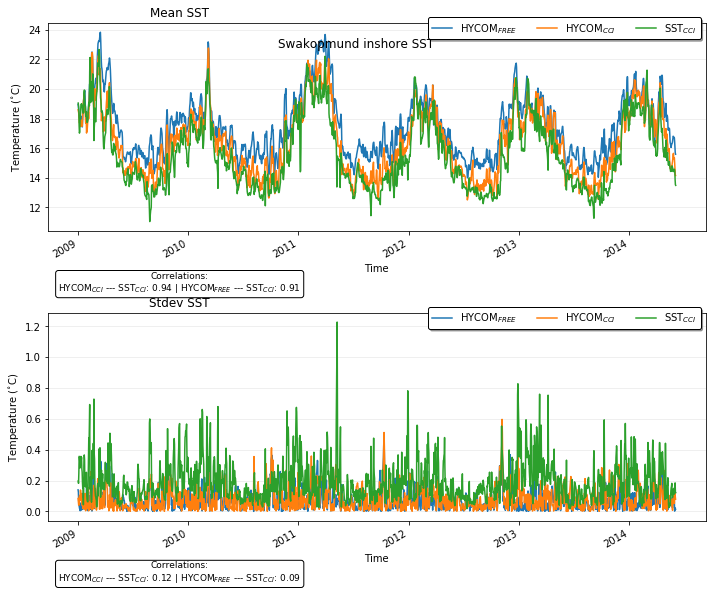

In [172]:
mean_corr_ccisst = round(np.corrcoef(swa_in_cci['temperature'][:,0],swa_in_sst['analysed_sst'])[0,1],2)
mean_corr_freesst = round(np.corrcoef(swa_in_free['temperature'][:,0],swa_in_sst['analysed_sst'])[0,1],2)

std_corr_ccisst = round(np.corrcoef(swa_in_cci_std['temperature'][:,0],swa_in_sst_std['analysed_sst'])[0,1],2)
std_corr_freesst = round(np.corrcoef(swa_in_free_std['temperature'][:,0],swa_in_sst_std['analysed_sst'])[0,1],2)

fig = plt.figure(figsize=(10,8.2))
fig.suptitle('Swakopmund inshore SST', y=0.93)

########################################################################################################################################################################
### Subplot 1: Plotting mean
########################################################################################################################################################################

ax1 = plt.subplot(2,1,1)

swa_in_free['temperature'].plot.line(x='time',label='HYCOM$_{FREE}$')
swa_in_cci['temperature'].plot.line(x='time',label='HYCOM$_{CCI}$')
swa_in_sst['analysed_sst'].plot.line(x='time',label='SST$_{CCI}$')
plt.title('Mean SST', x=0.2)
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Time')
ax1.grid(axis='y', alpha=0.25)
ax1.set_aspect('auto')

ax1textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_freesst)

ax1.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.05), ncol=3, fancybox=True, shadow=True)
ax1.text(0.2, -0.25, ax1textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=ax1.transAxes, bbox = dict(boxstyle='round', facecolor='white'))

########################################################################################################################################################################
### Subplot 2: Plotting standard deviation
########################################################################################################################################################################

ax2 = plt.subplot(2,1,2)

swa_in_free_std['temperature'].plot.line(x='time',label='HYCOM$_{FREE}$')
swa_in_cci_std['temperature'].plot.line(x='time',label='HYCOM$_{CCI}$')
swa_in_sst_std['analysed_sst'].plot.line(x='time',label='SST$_{CCI}$')
plt.title('Stdev SST', x=0.2)
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Time')
ax2.grid(axis='y', alpha=0.25)
ax2.set_aspect('auto')

ax2textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(std_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(std_corr_freesst)

ax2.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.05), ncol=3, fancybox=True, shadow=True)
ax2.text(0.2, -0.25, ax2textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=ax2.transAxes, bbox = dict(boxstyle='round', facecolor='white'))

plt.subplots_adjust(hspace=0.6)

plt.savefig('../Figures/sst/TimeSeries_SwakopmundIn.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

#### Climatology

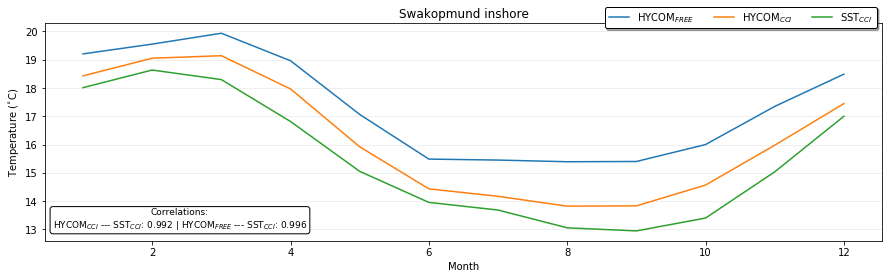

In [249]:
# # calculating correlations
mean_corr_ccisst = round(np.corrcoef(swa_in_cci_clima['temperature'][:,0],swa_in_sst_clima['analysed_sst'])[0,1],3)
mean_corr_ccifree = round(np.corrcoef(swa_in_cci_clima['temperature'][:,0],swa_in_free_clima['temperature'][:,0])[0,1],3)

fig = plt.figure(figsize=(15,4))
swa_in_free_clima['temperature'][:,0].plot.line(x='month',label='HYCOM$_{FREE}$')
swa_in_cci_clima['temperature'][:,0].plot.line(x='month',label='HYCOM$_{CCI}$')
swa_in_sst_clima['analysed_sst'].plot.line(x='month',label='SST$_{CCI}$')
plt.title('Swakopmund inshore')
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Month')
plt.grid(axis='y', alpha=0.25)

# textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: {0} | HYCOM$_{FREE}$ --- SST$_{CCI}$: {0}'.format(mean_corr_ccifree,mean_corr_ccifree)
textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccifree)

plt.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.1), ncol=3, fancybox=True, shadow=True)
fig.text(0.25, 0.2, textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=fig.transFigure, bbox = dict(boxstyle='round', facecolor='white'))
plt.savefig('../Figures/sst/TimeSeries_Climatology_SwakopmundIn.png', dpi=300, bbox_inches='tight', format='png')

plt.show()

#### De-seasonalised / Anomalies

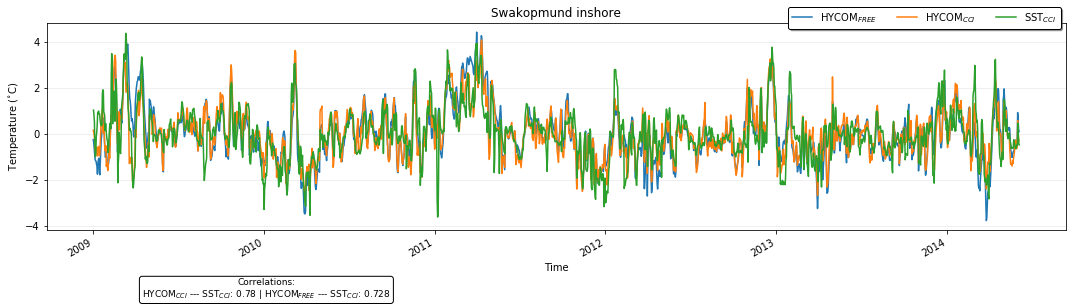

In [174]:
# calculating correlations
mean_corr_ccisst = round(np.corrcoef(swa_in_cci_deseasoned['temperature'][:,0],swa_in_sst_deseasoned['analysed_sst'])[0,1],3)
mean_corr_freesst = round(np.corrcoef(swa_in_free_deseasoned['temperature'][:,0],swa_in_sst_deseasoned['analysed_sst'])[0,1],3)

fig = plt.figure(figsize=(15,4))
swa_in_free_deseasoned['temperature'].plot.line(x='time',label='HYCOM$_{FREE}$')
swa_in_cci_deseasoned['temperature'].plot.line(x='time',label='HYCOM$_{CCI}$')
swa_in_sst_deseasoned['analysed_sst'].plot.line(x='time',label='SST$_{CCI}$')
plt.title('Swakopmund inshore')
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Time')
plt.grid(axis='y', alpha=0.25)

textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_freesst)
fig.text(0.25, -0.02, textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=fig.transFigure, bbox = dict(boxstyle='round', facecolor='white'))
plt.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.1), ncol=3, fancybox=True, shadow=True)

plt.savefig('../Figures/sst/TimeSeries_SwakopmundIn_deseasoned.png', dpi=300, bbox_inches='tight', format='png')

plt.plot()
plt.tight_layout()

#### De-seasonalised scatter plot

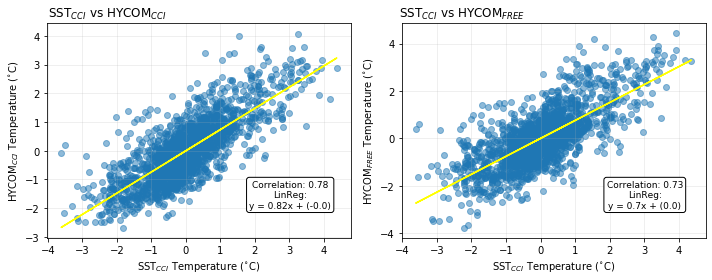

In [176]:
#_________________________________________________________________________________________________________________________________________
# calculating correlations and regressions

mean_corr_deseasoned_ccisst = round(np.corrcoef(swa_in_cci_deseasoned['temperature'][:,0],swa_in_sst_deseasoned['analysed_sst'])[0,1],2)
mean_corr_freesst = round(np.corrcoef(swa_in_free_deseasoned['temperature'][:,0],swa_in_sst_deseasoned['analysed_sst'])[0,1],2)

regress1 = stats.linregress(swa_in_cci_deseasoned['temperature'][:,0], swa_in_sst_deseasoned['analysed_sst'])
round(regress1.slope, 2)
round(regress1.intercept, 2)

regress2 = stats.linregress(swa_in_free_deseasoned['temperature'][:,0], swa_in_sst_deseasoned['analysed_sst'])
round(regress2.slope, 2)
round(regress2.intercept, 2)
#_________________________________________________________________________________________________________________________________________


fig = plt.figure(figsize=(10,4))
# fig.title('Hondeklip Bay inshore SST', y=0.93)

########################################################################################################################################################################
### Subplot 1: Plotting HYCOM_cci vs SST_cci
########################################################################################################################################################################

ax1 = plt.subplot(1,2,1)

b1, m1 = polyfit(swa_in_sst_deseasoned['analysed_sst'], swa_in_cci_deseasoned['temperature'], 1)

plt.scatter(swa_in_sst_deseasoned['analysed_sst'],swa_in_cci_deseasoned['temperature'], alpha=0.5)
plt.plot(swa_in_sst_deseasoned['analysed_sst'], b1 + m1 * swa_in_sst_deseasoned['analysed_sst'], '-', color='yellow')
plt.title('SST$_{CCI}$ vs HYCOM$_{CCI}$', x=0.2)
plt.xlabel('SST$_{CCI}$ Temperature ($^{\circ}$C)')
plt.ylabel('HYCOM$_{CCI}$ Temperature ($^{\circ}$C)')
ax1.grid(axis='both', alpha=0.25)

ax1textbox = 'Correlation: {0}'.format(mean_corr_ccisst) + '\nLinReg:\ny = {0}'.format(round(regress1.slope, 2)) + 'x + ({0})'.format(round(regress1.intercept, 2))
ax1.text(0.8, 0.2, ax1textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=ax1.transAxes, bbox = dict(boxstyle='round', facecolor='white'))

########################################################################################################################################################################
### Subplot 2: Plotting HYCOM_free vs SST_cci
########################################################################################################################################################################

ax2 = plt.subplot(1,2,2)

b2, m2 = polyfit(swa_in_sst_deseasoned['analysed_sst'], swa_in_free_deseasoned['temperature'], 1)

plt.scatter(swa_in_sst_deseasoned['analysed_sst'],swa_in_free_deseasoned['temperature'], alpha=0.5)
plt.plot(swa_in_sst_deseasoned['analysed_sst'], b2 + m2 * swa_in_sst_deseasoned['analysed_sst'], '-', color='yellow')
plt.title('SST$_{CCI}$ vs HYCOM$_{FREE}$', x=0.2)
plt.xlabel('SST$_{CCI}$ Temperature ($^{\circ}$C)')
plt.ylabel('HYCOM$_{FREE}$ Temperature ($^{\circ}$C)')
ax2.grid(axis='both', alpha=0.25)

ax2textbox = 'Correlation: {0}'.format(mean_corr_freesst) + '\nLinReg:\ny = {0}'.format(round(regress2.slope, 2)) + 'x + ({0})'.format(round(regress2.intercept, 2))
ax2.text(0.8, 0.2, ax2textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=ax2.transAxes, bbox = dict(boxstyle='round', facecolor='white'))

plt.subplots_adjust(hspace=0.6)

plt.savefig('../Figures/sst/Scatter_SwakopmundIn.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

### Swakopmund offshore

#### Including seasonal signal

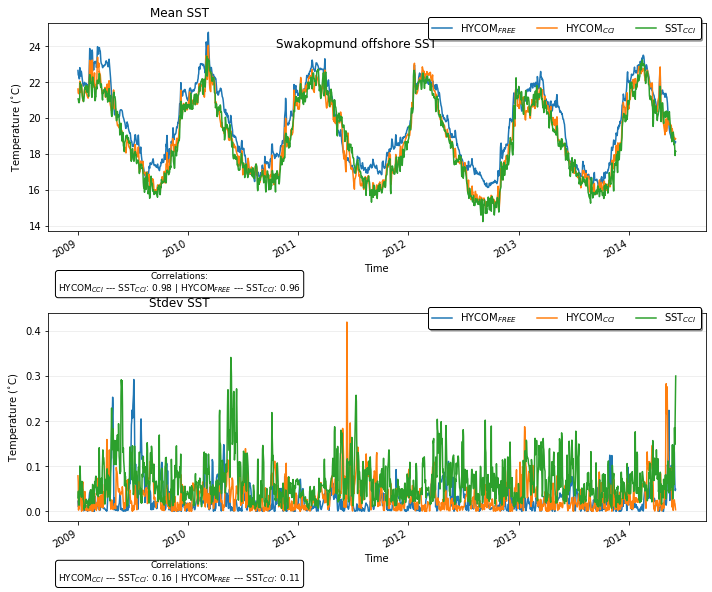

In [179]:
mean_corr_ccisst = round(np.corrcoef(swa_off_cci['temperature'][:,0],swa_off_sst['analysed_sst'])[0,1],2)
mean_corr_freesst = round(np.corrcoef(swa_off_free['temperature'][:,0],swa_off_sst['analysed_sst'])[0,1],2)

std_corr_ccisst = round(np.corrcoef(swa_off_cci_std['temperature'][:,0],swa_off_sst_std['analysed_sst'])[0,1],2)
std_corr_freesst = round(np.corrcoef(swa_off_free_std['temperature'][:,0],swa_off_sst_std['analysed_sst'])[0,1],2)

fig = plt.figure(figsize=(10,8.2))
fig.suptitle('Swakopmund offshore SST', y=0.93)

########################################################################################################################################################################
### Subplot 1: Plotting mean
########################################################################################################################################################################

ax1 = plt.subplot(2,1,1)

swa_off_free['temperature'].plot.line(x='time',label='HYCOM$_{FREE}$')
swa_off_cci['temperature'].plot.line(x='time',label='HYCOM$_{CCI}$')
swa_off_sst['analysed_sst'].plot.line(x='time',label='SST$_{CCI}$')
plt.title('Mean SST', x=0.2)
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Time')
ax1.grid(axis='y', alpha=0.25)
ax1.set_aspect('auto')

ax1textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_freesst)

ax1.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.05), ncol=3, fancybox=True, shadow=True)
ax1.text(0.2, -0.25, ax1textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=ax1.transAxes, bbox = dict(boxstyle='round', facecolor='white'))

########################################################################################################################################################################
### Subplot 2: Plotting standard deviation
########################################################################################################################################################################

ax2 = plt.subplot(2,1,2)

swa_off_free_std['temperature'].plot.line(x='time',label='HYCOM$_{FREE}$')
swa_off_cci_std['temperature'].plot.line(x='time',label='HYCOM$_{CCI}$')
swa_off_sst_std['analysed_sst'].plot.line(x='time',label='SST$_{CCI}$')
plt.title('Stdev SST', x=0.2)
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Time')
ax2.grid(axis='y', alpha=0.25)
ax2.set_aspect('auto')

ax2textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(std_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(std_corr_freesst)

ax2.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.05), ncol=3, fancybox=True, shadow=True)
ax2.text(0.2, -0.25, ax2textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=ax2.transAxes, bbox = dict(boxstyle='round', facecolor='white'))

plt.subplots_adjust(hspace=0.6)

plt.savefig('../Figures/sst/TimeSeries_SwakopmundOff.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

#### Climatology

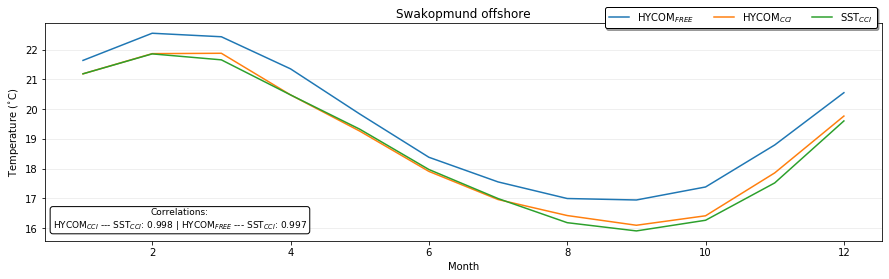

In [251]:
# # calculating correlations
mean_corr_ccisst = round(np.corrcoef(swa_off_cci_clima['temperature'][:,0],swa_off_sst_clima['analysed_sst'])[0,1],3)
mean_corr_ccifree = round(np.corrcoef(swa_off_cci_clima['temperature'][:,0],swa_off_free_clima['temperature'][:,0])[0,1],3)

fig = plt.figure(figsize=(15,4))
swa_off_free_clima['temperature'][:,0].plot.line(x='month',label='HYCOM$_{FREE}$')
swa_off_cci_clima['temperature'][:,0].plot.line(x='month',label='HYCOM$_{CCI}$')
swa_off_sst_clima['analysed_sst'].plot.line(x='month',label='SST$_{CCI}$')
plt.title('Swakopmund offshore')
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Month')
plt.grid(axis='y', alpha=0.25)

# textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: {0} | HYCOM$_{FREE}$ --- SST$_{CCI}$: {0}'.format(mean_corr_ccifree,mean_corr_ccifree)
textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccifree)

plt.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.1), ncol=3, fancybox=True, shadow=True)
fig.text(0.25, 0.2, textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=fig.transFigure, bbox = dict(boxstyle='round', facecolor='white'))
plt.savefig('../Figures/sst/TimeSeries_Climatology_SwakopmundOff.png', dpi=300, bbox_inches='tight', format='png')

plt.show()

#### De-seasonalised / Anomalies

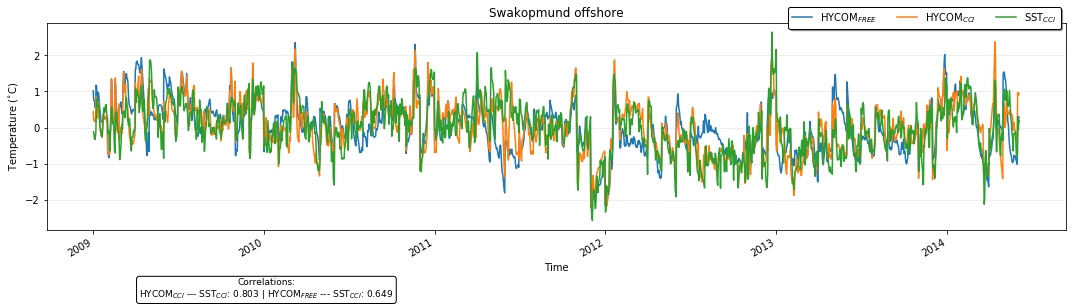

In [181]:
# calculating correlations
mean_corr_ccisst = round(np.corrcoef(swa_off_cci_deseasoned['temperature'][:,0],swa_off_sst_deseasoned['analysed_sst'])[0,1],3)
mean_corr_freesst = round(np.corrcoef(swa_off_free_deseasoned['temperature'][:,0],swa_off_sst_deseasoned['analysed_sst'])[0,1],3)

fig = plt.figure(figsize=(15,4))
swa_off_free_deseasoned['temperature'].plot.line(x='time',label='HYCOM$_{FREE}$')
swa_off_cci_deseasoned['temperature'].plot.line(x='time',label='HYCOM$_{CCI}$')
swa_off_sst_deseasoned['analysed_sst'].plot.line(x='time',label='SST$_{CCI}$')
plt.title('Swakopmund offshore')
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Time')
plt.grid(axis='y', alpha=0.25)

textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_freesst)
fig.text(0.25, -0.02, textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=fig.transFigure, bbox = dict(boxstyle='round', facecolor='white'))
plt.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.1), ncol=3, fancybox=True, shadow=True)

plt.savefig('../Figures/sst/TimeSeries_SwakopmundOff_deseasoned.png', dpi=300, bbox_inches='tight', format='png')

plt.plot()
plt.tight_layout()

#### De-seasonalised scatter plot

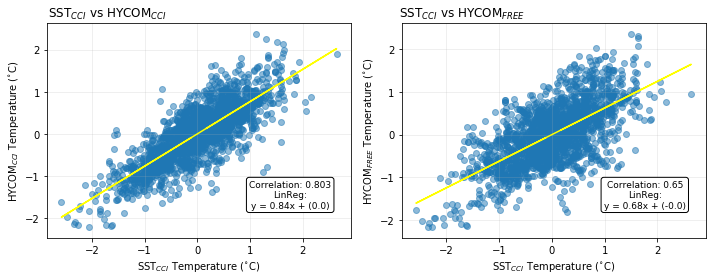

In [183]:
#_________________________________________________________________________________________________________________________________________
# calculating correlations and regressions

mean_corr_deseasoned_ccisst = round(np.corrcoef(swa_off_cci_deseasoned['temperature'][:,0],swa_off_sst_deseasoned['analysed_sst'])[0,1],2)
mean_corr_freesst = round(np.corrcoef(swa_off_free_deseasoned['temperature'][:,0],swa_off_sst_deseasoned['analysed_sst'])[0,1],2)

regress1 = stats.linregress(swa_off_cci_deseasoned['temperature'][:,0], swa_off_sst_deseasoned['analysed_sst'])
round(regress1.slope, 2)
round(regress1.intercept, 2)

regress2 = stats.linregress(swa_off_free_deseasoned['temperature'][:,0], swa_off_sst_deseasoned['analysed_sst'])
round(regress2.slope, 2)
round(regress2.intercept, 2)
#_________________________________________________________________________________________________________________________________________


fig = plt.figure(figsize=(10,4))
# fig.title('Hondeklip Bay inshore SST', y=0.93)

########################################################################################################################################################################
### Subplot 1: Plotting HYCOM_cci vs SST_cci
########################################################################################################################################################################

ax1 = plt.subplot(1,2,1)

b1, m1 = polyfit(swa_off_sst_deseasoned['analysed_sst'], swa_off_cci_deseasoned['temperature'], 1)

plt.scatter(swa_off_sst_deseasoned['analysed_sst'],swa_off_cci_deseasoned['temperature'], alpha=0.5)
plt.plot(swa_off_sst_deseasoned['analysed_sst'], b1 + m1 * swa_off_sst_deseasoned['analysed_sst'], '-', color='yellow')
plt.title('SST$_{CCI}$ vs HYCOM$_{CCI}$', x=0.2)
plt.xlabel('SST$_{CCI}$ Temperature ($^{\circ}$C)')
plt.ylabel('HYCOM$_{CCI}$ Temperature ($^{\circ}$C)')
ax1.grid(axis='both', alpha=0.25)

ax1textbox = 'Correlation: {0}'.format(mean_corr_ccisst) + '\nLinReg:\ny = {0}'.format(round(regress1.slope, 2)) + 'x + ({0})'.format(round(regress1.intercept, 2))
ax1.text(0.8, 0.2, ax1textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=ax1.transAxes, bbox = dict(boxstyle='round', facecolor='white'))

########################################################################################################################################################################
### Subplot 2: Plotting HYCOM_free vs SST_cci
########################################################################################################################################################################

ax2 = plt.subplot(1,2,2)

b2, m2 = polyfit(swa_off_sst_deseasoned['analysed_sst'], swa_off_free_deseasoned['temperature'], 1)

plt.scatter(swa_off_sst_deseasoned['analysed_sst'],swa_off_free_deseasoned['temperature'], alpha=0.5)
plt.plot(swa_off_sst_deseasoned['analysed_sst'], b2 + m2 * swa_off_sst_deseasoned['analysed_sst'], '-', color='yellow')
plt.title('SST$_{CCI}$ vs HYCOM$_{FREE}$', x=0.2)
plt.xlabel('SST$_{CCI}$ Temperature ($^{\circ}$C)')
plt.ylabel('HYCOM$_{FREE}$ Temperature ($^{\circ}$C)')
ax2.grid(axis='both', alpha=0.25)

ax2textbox = 'Correlation: {0}'.format(mean_corr_freesst) + '\nLinReg:\ny = {0}'.format(round(regress2.slope, 2)) + 'x + ({0})'.format(round(regress2.intercept, 2))
ax2.text(0.8, 0.2, ax2textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=ax2.transAxes, bbox = dict(boxstyle='round', facecolor='white'))

plt.subplots_adjust(hspace=0.6)

plt.savefig('../Figures/sst/Scatter_SwakopmundOff.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

### Luderitz cell

#### Including seasonal signal

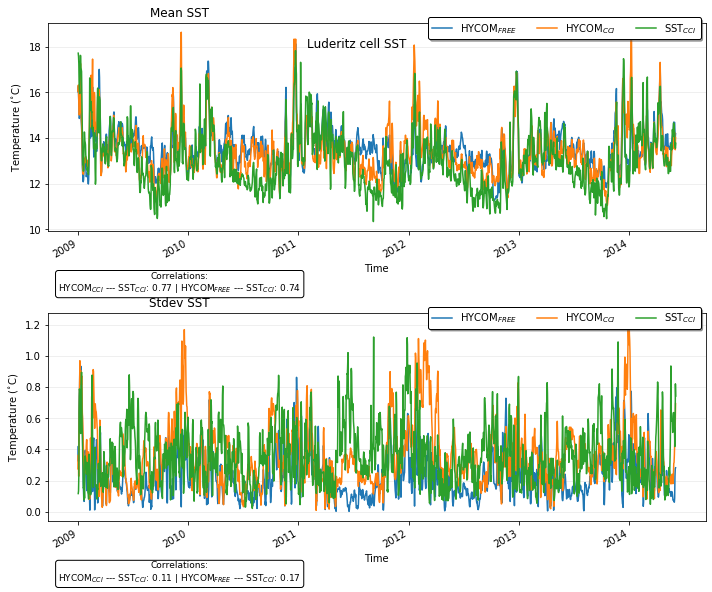

In [185]:
mean_corr_ccisst = round(np.corrcoef(lud_in_cci['temperature'][:,0],lud_in_sst['analysed_sst'])[0,1],2)
mean_corr_freesst = round(np.corrcoef(lud_in_free['temperature'][:,0],lud_in_sst['analysed_sst'])[0,1],2)

std_corr_ccisst = round(np.corrcoef(lud_in_cci_std['temperature'][:,0],lud_in_sst_std['analysed_sst'])[0,1],2)
std_corr_freesst = round(np.corrcoef(lud_in_free_std['temperature'][:,0],lud_in_sst_std['analysed_sst'])[0,1],2)

fig = plt.figure(figsize=(10,8.2))
fig.suptitle('Luderitz cell SST', y=0.93)

########################################################################################################################################################################
### Subplot 1: Plotting mean
########################################################################################################################################################################

ax1 = plt.subplot(2,1,1)

lud_in_free['temperature'].plot.line(x='time',label='HYCOM$_{FREE}$')
lud_in_cci['temperature'].plot.line(x='time',label='HYCOM$_{CCI}$')
lud_in_sst['analysed_sst'].plot.line(x='time',label='SST$_{CCI}$')
plt.title('Mean SST', x=0.2)
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Time')
ax1.grid(axis='y', alpha=0.25)
ax1.set_aspect('auto')

ax1textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_freesst)

ax1.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.05), ncol=3, fancybox=True, shadow=True)
ax1.text(0.2, -0.25, ax1textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=ax1.transAxes, bbox = dict(boxstyle='round', facecolor='white'))

########################################################################################################################################################################
### Subplot 2: Plotting standard deviation
########################################################################################################################################################################

ax2 = plt.subplot(2,1,2)

lud_in_free_std['temperature'].plot.line(x='time',label='HYCOM$_{FREE}$')
lud_in_cci_std['temperature'].plot.line(x='time',label='HYCOM$_{CCI}$')
lud_in_sst_std['analysed_sst'].plot.line(x='time',label='SST$_{CCI}$')
plt.title('Stdev SST', x=0.2)
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Time')
ax2.grid(axis='y', alpha=0.25)
ax2.set_aspect('auto')

ax2textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(std_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(std_corr_freesst)

ax2.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.05), ncol=3, fancybox=True, shadow=True)
ax2.text(0.2, -0.25, ax2textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=ax2.transAxes, bbox = dict(boxstyle='round', facecolor='white'))

plt.subplots_adjust(hspace=0.6)

plt.savefig('../Figures/sst/TimeSeries_LuderitzIn.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

#### Climatology

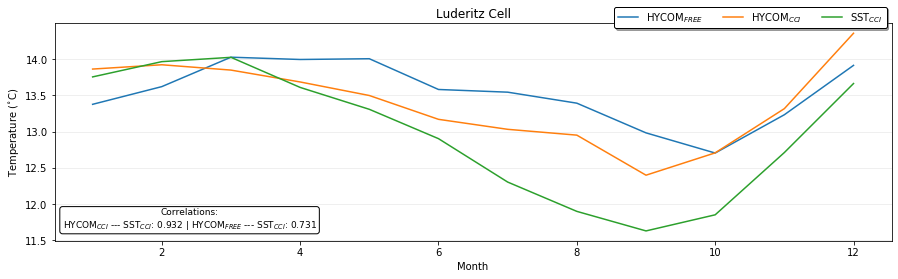

In [253]:
# # calculating correlations
mean_corr_ccisst = round(np.corrcoef(lud_in_cci_clima['temperature'][:,0],lud_in_sst_clima['analysed_sst'])[0,1],3)
mean_corr_ccifree = round(np.corrcoef(lud_in_cci_clima['temperature'][:,0],lud_in_free_clima['temperature'][:,0])[0,1],3)

fig = plt.figure(figsize=(15,4))
lud_in_free_clima['temperature'][:,0].plot.line(x='month',label='HYCOM$_{FREE}$')
lud_in_cci_clima['temperature'][:,0].plot.line(x='month',label='HYCOM$_{CCI}$')
lud_in_sst_clima['analysed_sst'].plot.line(x='month',label='SST$_{CCI}$')
plt.title('Luderitz Cell')
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Month')
plt.grid(axis='y', alpha=0.25)

# textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: {0} | HYCOM$_{FREE}$ --- SST$_{CCI}$: {0}'.format(mean_corr_ccifree,mean_corr_ccifree)
textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccifree)

plt.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.1), ncol=3, fancybox=True, shadow=True)
fig.text(0.25, 0.2, textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=fig.transFigure, bbox = dict(boxstyle='round', facecolor='white'))
plt.savefig('../Figures/sst/TimeSeries_Climatology_LuderitzIn.png', dpi=300, bbox_inches='tight', format='png')

plt.show()

#### De-seasonalised / Anomalies

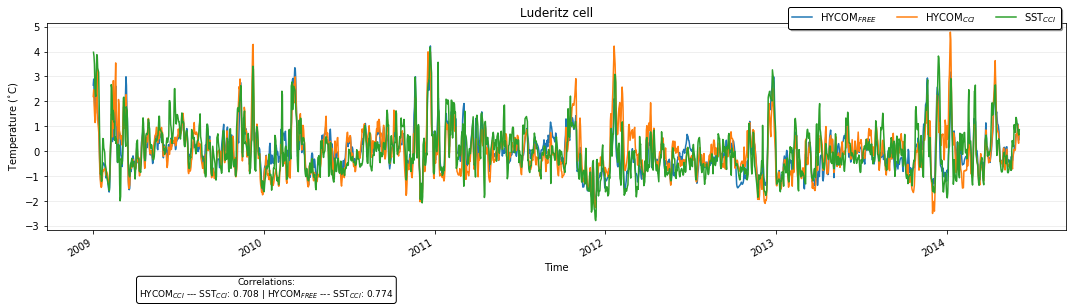

In [187]:
# calculating correlations
mean_corr_ccisst = round(np.corrcoef(lud_in_cci_deseasoned['temperature'][:,0],lud_in_sst_deseasoned['analysed_sst'])[0,1],3)
mean_corr_freesst = round(np.corrcoef(lud_in_free_deseasoned['temperature'][:,0],lud_in_sst_deseasoned['analysed_sst'])[0,1],3)

fig = plt.figure(figsize=(15,4))
lud_in_free_deseasoned['temperature'].plot.line(x='time',label='HYCOM$_{FREE}$')
lud_in_cci_deseasoned['temperature'].plot.line(x='time',label='HYCOM$_{CCI}$')
lud_in_sst_deseasoned['analysed_sst'].plot.line(x='time',label='SST$_{CCI}$')
plt.title('Luderitz cell')
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Time')
plt.grid(axis='y', alpha=0.25)

textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_freesst)
fig.text(0.25, -0.02, textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=fig.transFigure, bbox = dict(boxstyle='round', facecolor='white'))
plt.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.1), ncol=3, fancybox=True, shadow=True)

plt.savefig('../Figures/sst/TimeSeries_LuderitzIn_deseasoned.png', dpi=300, bbox_inches='tight', format='png')

plt.plot()
plt.tight_layout()

#### De-seasonalised scatter plot

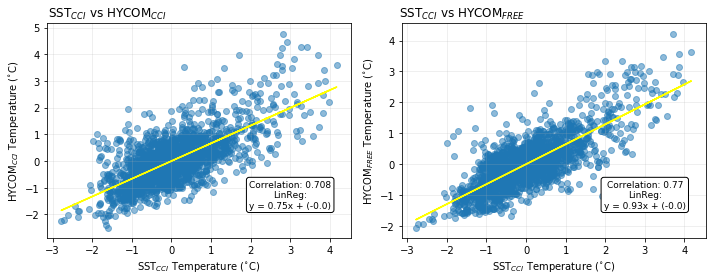

In [189]:
#_________________________________________________________________________________________________________________________________________
# calculating correlations and regressions

mean_corr_deseasoned_ccisst = round(np.corrcoef(lud_in_cci_deseasoned['temperature'][:,0],lud_in_sst_deseasoned['analysed_sst'])[0,1],2)
mean_corr_freesst = round(np.corrcoef(lud_in_free_deseasoned['temperature'][:,0],lud_in_sst_deseasoned['analysed_sst'])[0,1],2)

regress1 = stats.linregress(lud_in_cci_deseasoned['temperature'][:,0], lud_in_sst_deseasoned['analysed_sst'])
round(regress1.slope, 2)
round(regress1.intercept, 2)

regress2 = stats.linregress(lud_in_free_deseasoned['temperature'][:,0], lud_in_sst_deseasoned['analysed_sst'])
round(regress2.slope, 2)
round(regress2.intercept, 2)
#_________________________________________________________________________________________________________________________________________


fig = plt.figure(figsize=(10,4))
# fig.title('Hondeklip Bay inshore SST', y=0.93)

########################################################################################################################################################################
### Subplot 1: Plotting HYCOM_cci vs SST_cci
########################################################################################################################################################################

ax1 = plt.subplot(1,2,1)

b1, m1 = polyfit(lud_in_sst_deseasoned['analysed_sst'], lud_in_cci_deseasoned['temperature'], 1)

plt.scatter(lud_in_sst_deseasoned['analysed_sst'],lud_in_cci_deseasoned['temperature'], alpha=0.5)
plt.plot(lud_in_sst_deseasoned['analysed_sst'], b1 + m1 * lud_in_sst_deseasoned['analysed_sst'], '-', color='yellow')
plt.title('SST$_{CCI}$ vs HYCOM$_{CCI}$', x=0.2)
plt.xlabel('SST$_{CCI}$ Temperature ($^{\circ}$C)')
plt.ylabel('HYCOM$_{CCI}$ Temperature ($^{\circ}$C)')
ax1.grid(axis='both', alpha=0.25)

ax1textbox = 'Correlation: {0}'.format(mean_corr_ccisst) + '\nLinReg:\ny = {0}'.format(round(regress1.slope, 2)) + 'x + ({0})'.format(round(regress1.intercept, 2))
ax1.text(0.8, 0.2, ax1textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=ax1.transAxes, bbox = dict(boxstyle='round', facecolor='white'))

########################################################################################################################################################################
### Subplot 2: Plotting HYCOM_free vs SST_cci
########################################################################################################################################################################

ax2 = plt.subplot(1,2,2)

b2, m2 = polyfit(lud_in_sst_deseasoned['analysed_sst'], lud_in_free_deseasoned['temperature'], 1)

plt.scatter(lud_in_sst_deseasoned['analysed_sst'],lud_in_free_deseasoned['temperature'], alpha=0.5)
plt.plot(lud_in_sst_deseasoned['analysed_sst'], b2 + m2 * lud_in_sst_deseasoned['analysed_sst'], '-', color='yellow')
plt.title('SST$_{CCI}$ vs HYCOM$_{FREE}$', x=0.2)
plt.xlabel('SST$_{CCI}$ Temperature ($^{\circ}$C)')
plt.ylabel('HYCOM$_{FREE}$ Temperature ($^{\circ}$C)')
ax2.grid(axis='both', alpha=0.25)

ax2textbox = 'Correlation: {0}'.format(mean_corr_freesst) + '\nLinReg:\ny = {0}'.format(round(regress2.slope, 2)) + 'x + ({0})'.format(round(regress2.intercept, 2))
ax2.text(0.8, 0.2, ax2textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=ax2.transAxes, bbox = dict(boxstyle='round', facecolor='white'))

plt.subplots_adjust(hspace=0.6)

plt.savefig('../Figures/sst/Scatter_LuderitzIn.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## Agulhas region

### Port Shepstone current core

#### Including seasonal signal

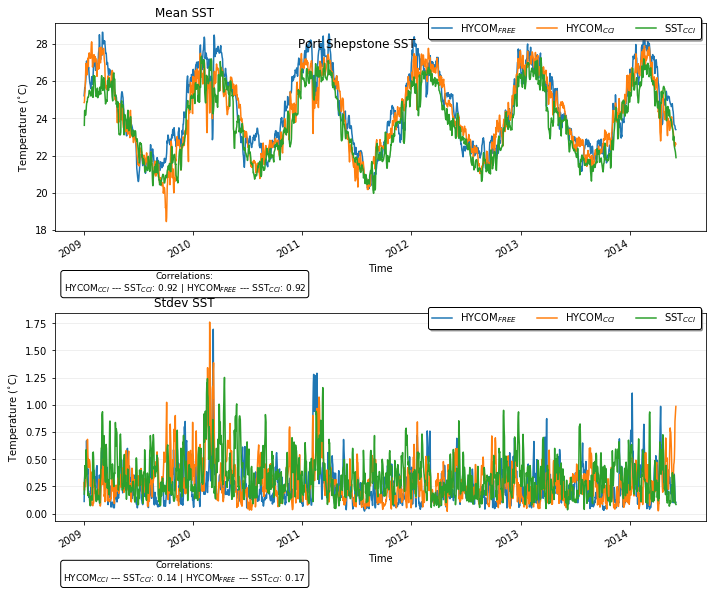

In [192]:
mean_corr_ccisst = round(np.corrcoef(ps_cci['temperature'][:,0],ps_sst['analysed_sst'])[0,1],2)
mean_corr_freesst = round(np.corrcoef(ps_free['temperature'][:,0],ps_sst['analysed_sst'])[0,1],2)

std_corr_ccisst = round(np.corrcoef(ps_cci_std['temperature'][:,0],ps_sst_std['analysed_sst'])[0,1],2)
std_corr_freesst = round(np.corrcoef(ps_free_std['temperature'][:,0],ps_sst_std['analysed_sst'])[0,1],2)

fig = plt.figure(figsize=(10,8.2))
fig.suptitle('Port Shepstone SST', y=0.93)

########################################################################################################################################################################
### Subplot 1: Plotting mean
########################################################################################################################################################################

ax1 = plt.subplot(2,1,1)

ps_free['temperature'].plot.line(x='time',label='HYCOM$_{FREE}$')
ps_cci['temperature'].plot.line(x='time',label='HYCOM$_{CCI}$')
ps_sst['analysed_sst'].plot.line(x='time',label='SST$_{CCI}$')
plt.title('Mean SST', x=0.2)
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Time')
ax1.grid(axis='y', alpha=0.25)
ax1.set_aspect('auto')

ax1textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_freesst)

ax1.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.05), ncol=3, fancybox=True, shadow=True)
ax1.text(0.2, -0.25, ax1textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=ax1.transAxes, bbox = dict(boxstyle='round', facecolor='white'))

########################################################################################################################################################################
### Subplot 2: Plotting standard deviation
########################################################################################################################################################################

ax2 = plt.subplot(2,1,2)

ps_free_std['temperature'].plot.line(x='time',label='HYCOM$_{FREE}$')
ps_cci_std['temperature'].plot.line(x='time',label='HYCOM$_{CCI}$')
ps_sst_std['analysed_sst'].plot.line(x='time',label='SST$_{CCI}$')
plt.title('Stdev SST', x=0.2)
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Time')
ax2.grid(axis='y', alpha=0.25)
ax2.set_aspect('auto')

ax2textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(std_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(std_corr_freesst)

ax2.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.05), ncol=3, fancybox=True, shadow=True)
ax2.text(0.2, -0.25, ax2textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=ax2.transAxes, bbox = dict(boxstyle='round', facecolor='white'))

plt.subplots_adjust(hspace=0.6)

plt.savefig('../Figures/sst/TimeSeries_PortShepstone.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

#### Climatology

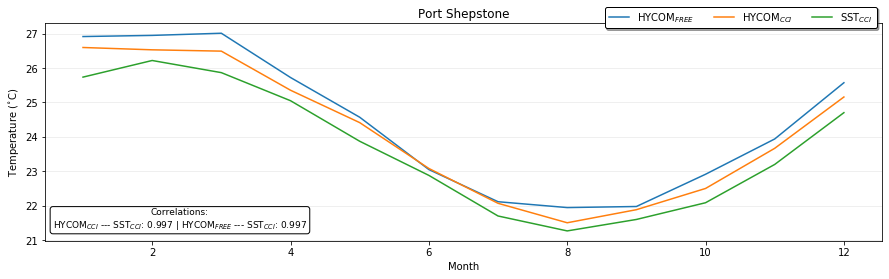

In [255]:
# # calculating correlations
mean_corr_ccisst = round(np.corrcoef(ps_cci_clima['temperature'][:,0],ps_sst_clima['analysed_sst'])[0,1],3)
mean_corr_ccifree = round(np.corrcoef(ps_cci_clima['temperature'][:,0],ps_free_clima['temperature'][:,0])[0,1],3)

fig = plt.figure(figsize=(15,4))
ps_free_clima['temperature'][:,0].plot.line(x='month',label='HYCOM$_{FREE}$')
ps_cci_clima['temperature'][:,0].plot.line(x='month',label='HYCOM$_{CCI}$')
ps_sst_clima['analysed_sst'].plot.line(x='month',label='SST$_{CCI}$')
plt.title('Port Shepstone')
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Month')
plt.grid(axis='y', alpha=0.25)

# textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: {0} | HYCOM$_{FREE}$ --- SST$_{CCI}$: {0}'.format(mean_corr_ccifree,mean_corr_ccifree)
textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccifree)

plt.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.1), ncol=3, fancybox=True, shadow=True)
fig.text(0.25, 0.2, textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=fig.transFigure, bbox = dict(boxstyle='round', facecolor='white'))
plt.savefig('../Figures/sst/TimeSeries_Climatology_PortShepstone.png', dpi=300, bbox_inches='tight', format='png')

plt.show()

#### De-seasonalised / Anomalies

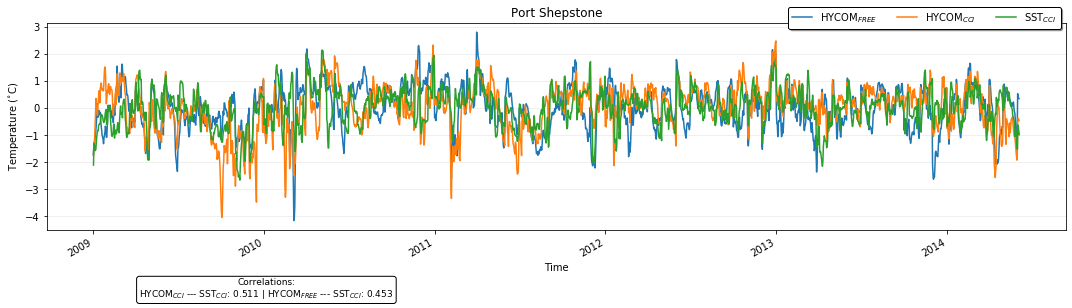

In [194]:
# calculating correlations
mean_corr_ccisst = round(np.corrcoef(ps_cci_deseasoned['temperature'][:,0],ps_sst_deseasoned['analysed_sst'])[0,1],3)
mean_corr_freesst = round(np.corrcoef(ps_free_deseasoned['temperature'][:,0],ps_sst_deseasoned['analysed_sst'])[0,1],3)

fig = plt.figure(figsize=(15,4))
ps_free_deseasoned['temperature'].plot.line(x='time',label='HYCOM$_{FREE}$')
ps_cci_deseasoned['temperature'].plot.line(x='time',label='HYCOM$_{CCI}$')
ps_sst_deseasoned['analysed_sst'].plot.line(x='time',label='SST$_{CCI}$')
plt.title('Port Shepstone')
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Time')
plt.grid(axis='y', alpha=0.25)

textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_freesst)
fig.text(0.25, -0.02, textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=fig.transFigure, bbox = dict(boxstyle='round', facecolor='white'))
plt.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.1), ncol=3, fancybox=True, shadow=True)

plt.savefig('../Figures/sst/TimeSeries_PortShepstone_deseasoned.png', dpi=300, bbox_inches='tight', format='png')

plt.plot()
plt.tight_layout()

#### De-seasonalised scatter plot

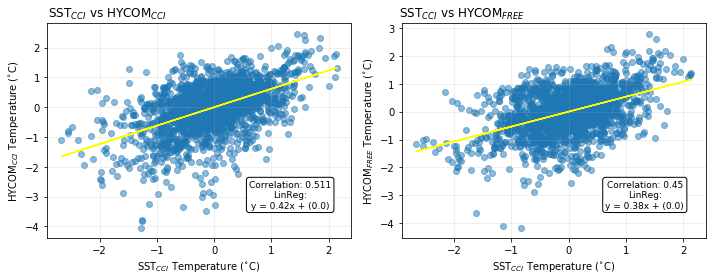

In [196]:
#_________________________________________________________________________________________________________________________________________
# calculating correlations and regressions

mean_corr_deseasoned_ccisst = round(np.corrcoef(ps_cci_deseasoned['temperature'][:,0],ps_sst_deseasoned['analysed_sst'])[0,1],2)
mean_corr_freesst = round(np.corrcoef(ps_free_deseasoned['temperature'][:,0],ps_sst_deseasoned['analysed_sst'])[0,1],2)

regress1 = stats.linregress(ps_cci_deseasoned['temperature'][:,0], ps_sst_deseasoned['analysed_sst'])
round(regress1.slope, 2)
round(regress1.intercept, 2)

regress2 = stats.linregress(ps_free_deseasoned['temperature'][:,0], ps_sst_deseasoned['analysed_sst'])
round(regress2.slope, 2)
round(regress2.intercept, 2)
#_________________________________________________________________________________________________________________________________________


fig = plt.figure(figsize=(10,4))
# fig.title('Hondeklip Bay inshore SST', y=0.93)

########################################################################################################################################################################
### Subplot 1: Plotting HYCOM_cci vs SST_cci
########################################################################################################################################################################

ax1 = plt.subplot(1,2,1)

b1, m1 = polyfit(ps_sst_deseasoned['analysed_sst'], ps_cci_deseasoned['temperature'], 1)

plt.scatter(ps_sst_deseasoned['analysed_sst'],ps_cci_deseasoned['temperature'], alpha=0.5)
plt.plot(ps_sst_deseasoned['analysed_sst'], b1 + m1 * ps_sst_deseasoned['analysed_sst'], '-', color='yellow')
plt.title('SST$_{CCI}$ vs HYCOM$_{CCI}$', x=0.2)
plt.xlabel('SST$_{CCI}$ Temperature ($^{\circ}$C)')
plt.ylabel('HYCOM$_{CCI}$ Temperature ($^{\circ}$C)')
ax1.grid(axis='both', alpha=0.25)

ax1textbox = 'Correlation: {0}'.format(mean_corr_ccisst) + '\nLinReg:\ny = {0}'.format(round(regress1.slope, 2)) + 'x + ({0})'.format(round(regress1.intercept, 2))
ax1.text(0.8, 0.2, ax1textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=ax1.transAxes, bbox = dict(boxstyle='round', facecolor='white'))

########################################################################################################################################################################
### Subplot 2: Plotting HYCOM_free vs SST_cci
########################################################################################################################################################################

ax2 = plt.subplot(1,2,2)

b2, m2 = polyfit(ps_sst_deseasoned['analysed_sst'], ps_free_deseasoned['temperature'], 1)

plt.scatter(ps_sst_deseasoned['analysed_sst'],ps_free_deseasoned['temperature'], alpha=0.5)
plt.plot(ps_sst_deseasoned['analysed_sst'], b2 + m2 * ps_sst_deseasoned['analysed_sst'], '-', color='yellow')
plt.title('SST$_{CCI}$ vs HYCOM$_{FREE}$', x=0.2)
plt.xlabel('SST$_{CCI}$ Temperature ($^{\circ}$C)')
plt.ylabel('HYCOM$_{FREE}$ Temperature ($^{\circ}$C)')
ax2.grid(axis='both', alpha=0.25)

ax2textbox = 'Correlation: {0}'.format(mean_corr_freesst) + '\nLinReg:\ny = {0}'.format(round(regress2.slope, 2)) + 'x + ({0})'.format(round(regress2.intercept, 2))
ax2.text(0.8, 0.2, ax2textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=ax2.transAxes, bbox = dict(boxstyle='round', facecolor='white'))

plt.subplots_adjust(hspace=0.6)

plt.savefig('../Figures/sst/Scatter_PortShepstone.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

### Port Elizabeth current core

#### Including seasonal signal

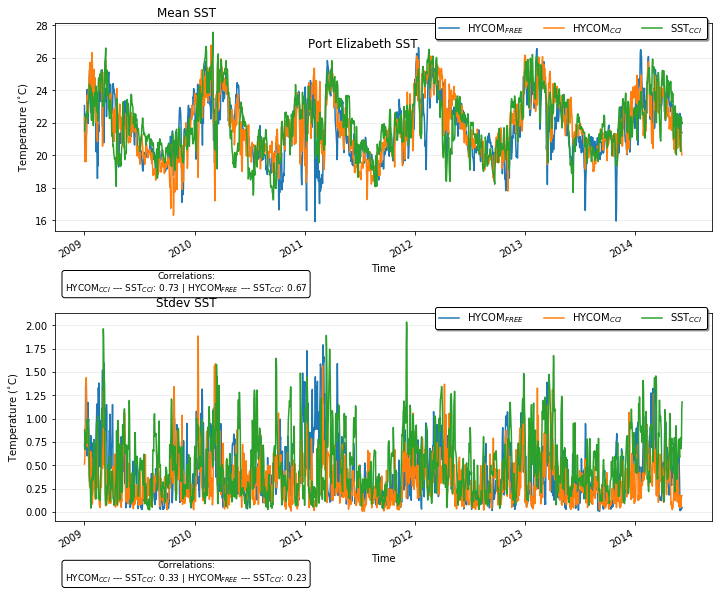

In [198]:
mean_corr_ccisst = round(np.corrcoef(pe_cci['temperature'][:,0],pe_sst['analysed_sst'])[0,1],2)
mean_corr_freesst = round(np.corrcoef(pe_free['temperature'][:,0],pe_sst['analysed_sst'])[0,1],2)

std_corr_ccisst = round(np.corrcoef(pe_cci_std['temperature'][:,0],pe_sst_std['analysed_sst'])[0,1],2)
std_corr_freesst = round(np.corrcoef(pe_free_std['temperature'][:,0],pe_sst_std['analysed_sst'])[0,1],2)

fig = plt.figure(figsize=(10,8.2))
fig.suptitle('Port Elizabeth SST', y=0.93)

########################################################################################################################################################################
### Subplot 1: Plotting mean
########################################################################################################################################################################

ax1 = plt.subplot(2,1,1)

pe_free['temperature'].plot.line(x='time',label='HYCOM$_{FREE}$')
pe_cci['temperature'].plot.line(x='time',label='HYCOM$_{CCI}$')
pe_sst['analysed_sst'].plot.line(x='time',label='SST$_{CCI}$')
plt.title('Mean SST', x=0.2)
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Time')
ax1.grid(axis='y', alpha=0.25)
ax1.set_aspect('auto')

ax1textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_freesst)

ax1.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.05), ncol=3, fancybox=True, shadow=True)
ax1.text(0.2, -0.25, ax1textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=ax1.transAxes, bbox = dict(boxstyle='round', facecolor='white'))

########################################################################################################################################################################
### Subplot 2: Plotting standard deviation
########################################################################################################################################################################

ax2 = plt.subplot(2,1,2)

pe_free_std['temperature'].plot.line(x='time',label='HYCOM$_{FREE}$')
pe_cci_std['temperature'].plot.line(x='time',label='HYCOM$_{CCI}$')
pe_sst_std['analysed_sst'].plot.line(x='time',label='SST$_{CCI}$')
plt.title('Stdev SST', x=0.2)
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Time')
ax2.grid(axis='y', alpha=0.25)
ax2.set_aspect('auto')

ax2textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(std_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(std_corr_freesst)

ax2.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.05), ncol=3, fancybox=True, shadow=True)
ax2.text(0.2, -0.25, ax2textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=ax2.transAxes, bbox = dict(boxstyle='round', facecolor='white'))

plt.subplots_adjust(hspace=0.6)

plt.savefig('../Figures/sst/TimeSeries_PortElizabeth.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

#### Climatology

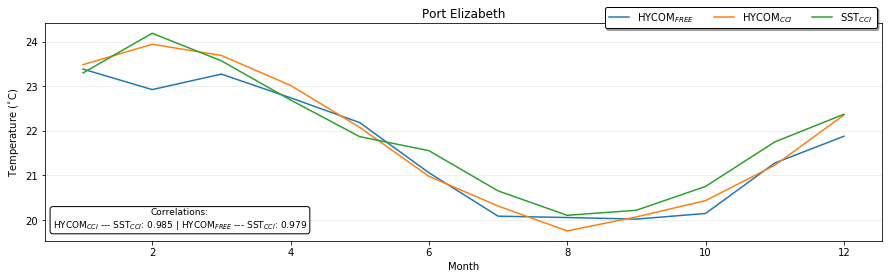

In [257]:
# # calculating correlations
mean_corr_ccisst = round(np.corrcoef(pe_cci_clima['temperature'][:,0],pe_sst_clima['analysed_sst'])[0,1],3)
mean_corr_ccifree = round(np.corrcoef(pe_cci_clima['temperature'][:,0],pe_free_clima['temperature'][:,0])[0,1],3)

fig = plt.figure(figsize=(15,4))
pe_free_clima['temperature'][:,0].plot.line(x='month',label='HYCOM$_{FREE}$')
pe_cci_clima['temperature'][:,0].plot.line(x='month',label='HYCOM$_{CCI}$')
pe_sst_clima['analysed_sst'].plot.line(x='month',label='SST$_{CCI}$')
plt.title('Port Elizabeth')
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Month')
plt.grid(axis='y', alpha=0.25)

# textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: {0} | HYCOM$_{FREE}$ --- SST$_{CCI}$: {0}'.format(mean_corr_ccifree,mean_corr_ccifree)
textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccifree)

plt.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.1), ncol=3, fancybox=True, shadow=True)
fig.text(0.25, 0.2, textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=fig.transFigure, bbox = dict(boxstyle='round', facecolor='white'))
plt.savefig('../Figures/sst/TimeSeries_Climatology_Elizabeth.png', dpi=300, bbox_inches='tight', format='png')

plt.show()

#### De-seasonalised / Anomalies

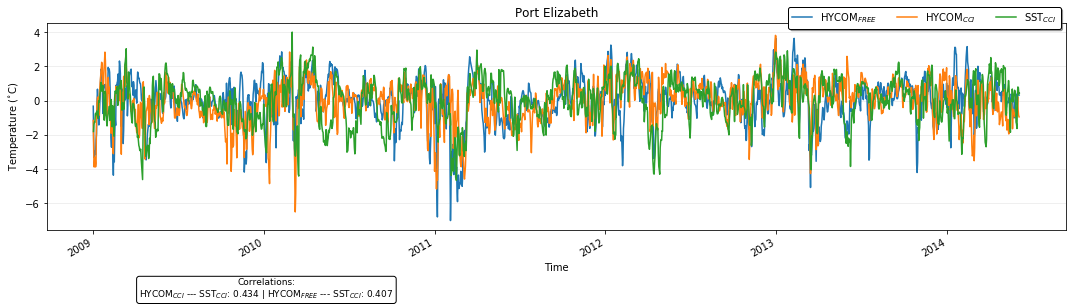

In [200]:
# calculating correlations
mean_corr_ccisst = round(np.corrcoef(pe_cci_deseasoned['temperature'][:,0],pe_sst_deseasoned['analysed_sst'])[0,1],3)
mean_corr_freesst = round(np.corrcoef(pe_free_deseasoned['temperature'][:,0],pe_sst_deseasoned['analysed_sst'])[0,1],3)

fig = plt.figure(figsize=(15,4))
pe_free_deseasoned['temperature'].plot.line(x='time',label='HYCOM$_{FREE}$')
pe_cci_deseasoned['temperature'].plot.line(x='time',label='HYCOM$_{CCI}$')
pe_sst_deseasoned['analysed_sst'].plot.line(x='time',label='SST$_{CCI}$')
plt.title('Port Elizabeth')
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Time')
plt.grid(axis='y', alpha=0.25)

textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_freesst)
fig.text(0.25, -0.02, textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=fig.transFigure, bbox = dict(boxstyle='round', facecolor='white'))
plt.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.1), ncol=3, fancybox=True, shadow=True)

plt.savefig('../Figures/sst/TimeSeries_PortElizabeth_deseasoned.png', dpi=300, bbox_inches='tight', format='png')

plt.plot()
plt.tight_layout()

#### De-seasonalised scatter plot

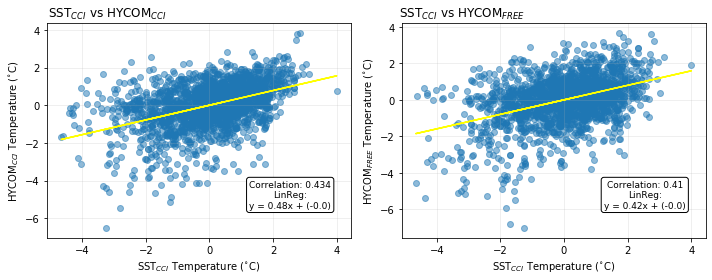

In [202]:
#_________________________________________________________________________________________________________________________________________
# calculating correlations and regressions

mean_corr_deseasoned_ccisst = round(np.corrcoef(pe_cci_deseasoned['temperature'][:,0],pe_sst_deseasoned['analysed_sst'])[0,1],2)
mean_corr_freesst = round(np.corrcoef(pe_free_deseasoned['temperature'][:,0],pe_sst_deseasoned['analysed_sst'])[0,1],2)

regress1 = stats.linregress(pe_cci_deseasoned['temperature'][:,0], pe_sst_deseasoned['analysed_sst'])
round(regress1.slope, 2)
round(regress1.intercept, 2)

regress2 = stats.linregress(pe_free_deseasoned['temperature'][:,0], pe_sst_deseasoned['analysed_sst'])
round(regress2.slope, 2)
round(regress2.intercept, 2)
#_________________________________________________________________________________________________________________________________________


fig = plt.figure(figsize=(10,4))
# fig.title('Hondeklip Bay inshore SST', y=0.93)

########################################################################################################################################################################
### Subplot 1: Plotting HYCOM_cci vs SST_cci
########################################################################################################################################################################

ax1 = plt.subplot(1,2,1)

b1, m1 = polyfit(pe_sst_deseasoned['analysed_sst'], pe_cci_deseasoned['temperature'], 1)

plt.scatter(pe_sst_deseasoned['analysed_sst'],pe_cci_deseasoned['temperature'], alpha=0.5)
plt.plot(pe_sst_deseasoned['analysed_sst'], b1 + m1 * pe_sst_deseasoned['analysed_sst'], '-', color='yellow')
plt.title('SST$_{CCI}$ vs HYCOM$_{CCI}$', x=0.2)
plt.xlabel('SST$_{CCI}$ Temperature ($^{\circ}$C)')
plt.ylabel('HYCOM$_{CCI}$ Temperature ($^{\circ}$C)')
ax1.grid(axis='both', alpha=0.25)

ax1textbox = 'Correlation: {0}'.format(mean_corr_ccisst) + '\nLinReg:\ny = {0}'.format(round(regress1.slope, 2)) + 'x + ({0})'.format(round(regress1.intercept, 2))
ax1.text(0.8, 0.2, ax1textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=ax1.transAxes, bbox = dict(boxstyle='round', facecolor='white'))

########################################################################################################################################################################
### Subplot 2: Plotting HYCOM_free vs SST_cci
########################################################################################################################################################################

ax2 = plt.subplot(1,2,2)

b2, m2 = polyfit(pe_sst_deseasoned['analysed_sst'], pe_free_deseasoned['temperature'], 1)

plt.scatter(pe_sst_deseasoned['analysed_sst'],pe_free_deseasoned['temperature'], alpha=0.5)
plt.plot(pe_sst_deseasoned['analysed_sst'], b2 + m2 * pe_sst_deseasoned['analysed_sst'], '-', color='yellow')
plt.title('SST$_{CCI}$ vs HYCOM$_{FREE}$', x=0.2)
plt.xlabel('SST$_{CCI}$ Temperature ($^{\circ}$C)')
plt.ylabel('HYCOM$_{FREE}$ Temperature ($^{\circ}$C)')
ax2.grid(axis='both', alpha=0.25)

ax2textbox = 'Correlation: {0}'.format(mean_corr_freesst) + '\nLinReg:\ny = {0}'.format(round(regress2.slope, 2)) + 'x + ({0})'.format(round(regress2.intercept, 2))
ax2.text(0.8, 0.2, ax2textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=ax2.transAxes, bbox = dict(boxstyle='round', facecolor='white'))

plt.subplots_adjust(hspace=0.6)

plt.savefig('../Figures/sst/Scatter_PortElizabeth.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

### Agulhas retroflection

#### Including seasonal signal

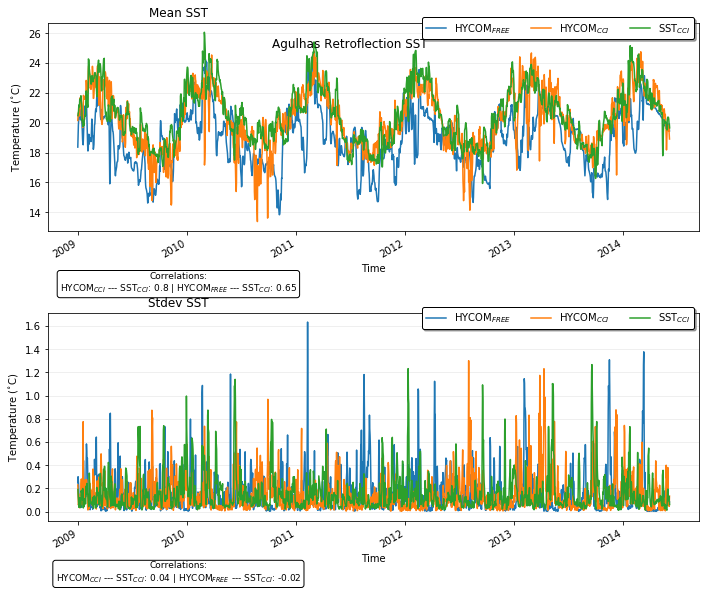

In [204]:
mean_corr_ccisst = round(np.corrcoef(ret_cci['temperature'][:,0],ret_sst['analysed_sst'])[0,1],2)
mean_corr_freesst = round(np.corrcoef(ret_free['temperature'][:,0],ret_sst['analysed_sst'])[0,1],2)

std_corr_ccisst = round(np.corrcoef(ret_cci_std['temperature'][:,0],ret_sst_std['analysed_sst'])[0,1],2)
std_corr_freesst = round(np.corrcoef(ret_free_std['temperature'][:,0],ret_sst_std['analysed_sst'])[0,1],2)

fig = plt.figure(figsize=(10,8.2))
fig.suptitle('Agulhas Retroflection SST', y=0.93)

########################################################################################################################################################################
### Subplot 1: Plotting mean
########################################################################################################################################################################

ax1 = plt.subplot(2,1,1)

ret_free['temperature'].plot.line(x='time',label='HYCOM$_{FREE}$')
ret_cci['temperature'].plot.line(x='time',label='HYCOM$_{CCI}$')
ret_sst['analysed_sst'].plot.line(x='time',label='SST$_{CCI}$')
plt.title('Mean SST', x=0.2)
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Time')
ax1.grid(axis='y', alpha=0.25)
ax1.set_aspect('auto')

ax1textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_freesst)

ax1.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.05), ncol=3, fancybox=True, shadow=True)
ax1.text(0.2, -0.25, ax1textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=ax1.transAxes, bbox = dict(boxstyle='round', facecolor='white'))

########################################################################################################################################################################
### Subplot 2: Plotting standard deviation
########################################################################################################################################################################

ax2 = plt.subplot(2,1,2)

ret_free_std['temperature'].plot.line(x='time',label='HYCOM$_{FREE}$')
ret_cci_std['temperature'].plot.line(x='time',label='HYCOM$_{CCI}$')
ret_sst_std['analysed_sst'].plot.line(x='time',label='SST$_{CCI}$')
plt.title('Stdev SST', x=0.2)
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Time')
ax2.grid(axis='y', alpha=0.25)
ax2.set_aspect('auto')

ax2textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(std_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(std_corr_freesst)

ax2.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.05), ncol=3, fancybox=True, shadow=True)
ax2.text(0.2, -0.25, ax2textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=ax2.transAxes, bbox = dict(boxstyle='round', facecolor='white'))

plt.subplots_adjust(hspace=0.6)

plt.savefig('../Figures/sst/TimeSeries_AgulhasRetroflection.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

#### Climatology

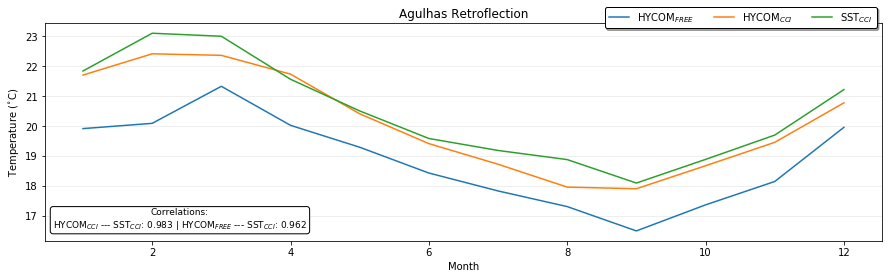

In [259]:
# # calculating correlations
mean_corr_ccisst = round(np.corrcoef(ret_cci_clima['temperature'][:,0],ret_sst_clima['analysed_sst'])[0,1],3)
mean_corr_ccifree = round(np.corrcoef(ret_cci_clima['temperature'][:,0],ret_free_clima['temperature'][:,0])[0,1],3)

fig = plt.figure(figsize=(15,4))
ret_free_clima['temperature'][:,0].plot.line(x='month',label='HYCOM$_{FREE}$')
ret_cci_clima['temperature'][:,0].plot.line(x='month',label='HYCOM$_{CCI}$')
ret_sst_clima['analysed_sst'].plot.line(x='month',label='SST$_{CCI}$')
plt.title('Agulhas Retroflection')
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Month')
plt.grid(axis='y', alpha=0.25)

# textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: {0} | HYCOM$_{FREE}$ --- SST$_{CCI}$: {0}'.format(mean_corr_ccifree,mean_corr_ccifree)
textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccifree)

plt.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.1), ncol=3, fancybox=True, shadow=True)
fig.text(0.25, 0.2, textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=fig.transFigure, bbox = dict(boxstyle='round', facecolor='white'))
plt.savefig('../Figures/sst/TimeSeries_Climatology_AgulhasRetroflection.png', dpi=300, bbox_inches='tight', format='png')

plt.show()

#### De-seasonalised / Anomalies

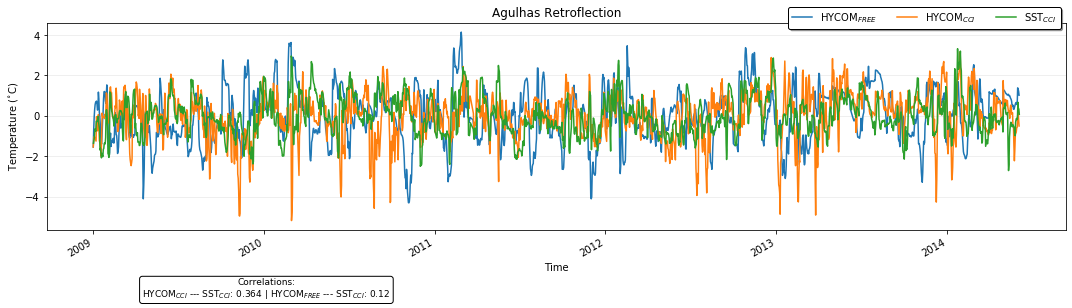

In [206]:
# calculating correlations
mean_corr_ccisst = round(np.corrcoef(ret_cci_deseasoned['temperature'][:,0],ret_sst_deseasoned['analysed_sst'])[0,1],3)
mean_corr_freesst = round(np.corrcoef(ret_free_deseasoned['temperature'][:,0],ret_sst_deseasoned['analysed_sst'])[0,1],3)

fig = plt.figure(figsize=(15,4))
ret_free_deseasoned['temperature'].plot.line(x='time',label='HYCOM$_{FREE}$')
ret_cci_deseasoned['temperature'].plot.line(x='time',label='HYCOM$_{CCI}$')
ret_sst_deseasoned['analysed_sst'].plot.line(x='time',label='SST$_{CCI}$')
plt.title('Agulhas Retroflection')
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Time')
plt.grid(axis='y', alpha=0.25)

textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_freesst)
fig.text(0.25, -0.02, textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=fig.transFigure, bbox = dict(boxstyle='round', facecolor='white'))
plt.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.1), ncol=3, fancybox=True, shadow=True)

plt.savefig('../Figures/sst/TimeSeries_AgulhasRetroflection_deseasoned.png', dpi=300, bbox_inches='tight', format='png')

plt.plot()
plt.tight_layout()

#### De-seasonalised scatter plot

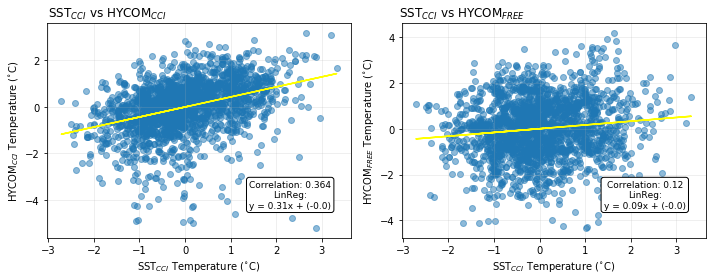

In [208]:
#_________________________________________________________________________________________________________________________________________
# calculating correlations and regressions

mean_corr_deseasoned_ccisst = round(np.corrcoef(ret_cci_deseasoned['temperature'][:,0],ret_sst_deseasoned['analysed_sst'])[0,1],2)
mean_corr_freesst = round(np.corrcoef(ret_free_deseasoned['temperature'][:,0],ret_sst_deseasoned['analysed_sst'])[0,1],2)

regress1 = stats.linregress(ret_cci_deseasoned['temperature'][:,0], ret_sst_deseasoned['analysed_sst'])
round(regress1.slope, 2)
round(regress1.intercept, 2)

regress2 = stats.linregress(ret_free_deseasoned['temperature'][:,0], ret_sst_deseasoned['analysed_sst'])
round(regress2.slope, 2)
round(regress2.intercept, 2)
#_________________________________________________________________________________________________________________________________________


fig = plt.figure(figsize=(10,4))
# fig.title('Hondeklip Bay inshore SST', y=0.93)

########################################################################################################################################################################
### Subplot 1: Plotting HYCOM_cci vs SST_cci
########################################################################################################################################################################

ax1 = plt.subplot(1,2,1)

b1, m1 = polyfit(ret_sst_deseasoned['analysed_sst'], ret_cci_deseasoned['temperature'], 1)

plt.scatter(ret_sst_deseasoned['analysed_sst'],ret_cci_deseasoned['temperature'], alpha=0.5)
plt.plot(ret_sst_deseasoned['analysed_sst'], b1 + m1 * ret_sst_deseasoned['analysed_sst'], '-', color='yellow')
plt.title('SST$_{CCI}$ vs HYCOM$_{CCI}$', x=0.2)
plt.xlabel('SST$_{CCI}$ Temperature ($^{\circ}$C)')
plt.ylabel('HYCOM$_{CCI}$ Temperature ($^{\circ}$C)')
ax1.grid(axis='both', alpha=0.25)

ax1textbox = 'Correlation: {0}'.format(mean_corr_ccisst) + '\nLinReg:\ny = {0}'.format(round(regress1.slope, 2)) + 'x + ({0})'.format(round(regress1.intercept, 2))
ax1.text(0.8, 0.2, ax1textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=ax1.transAxes, bbox = dict(boxstyle='round', facecolor='white'))

########################################################################################################################################################################
### Subplot 2: Plotting HYCOM_free vs SST_cci
########################################################################################################################################################################

ax2 = plt.subplot(1,2,2)

b2, m2 = polyfit(ret_sst_deseasoned['analysed_sst'], ret_free_deseasoned['temperature'], 1)

plt.scatter(ret_sst_deseasoned['analysed_sst'],ret_free_deseasoned['temperature'], alpha=0.5)
plt.plot(ret_sst_deseasoned['analysed_sst'], b2 + m2 * ret_sst_deseasoned['analysed_sst'], '-', color='yellow')
plt.title('SST$_{CCI}$ vs HYCOM$_{FREE}$', x=0.2)
plt.xlabel('SST$_{CCI}$ Temperature ($^{\circ}$C)')
plt.ylabel('HYCOM$_{FREE}$ Temperature ($^{\circ}$C)')
ax2.grid(axis='both', alpha=0.25)

ax2textbox = 'Correlation: {0}'.format(mean_corr_freesst) + '\nLinReg:\ny = {0}'.format(round(regress2.slope, 2)) + 'x + ({0})'.format(round(regress2.intercept, 2))
ax2.text(0.8, 0.2, ax2textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=ax2.transAxes, bbox = dict(boxstyle='round', facecolor='white'))

plt.subplots_adjust(hspace=0.6)

plt.savefig('../Figures/sst/Scatter_AgulhasRetroflection.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

### Agulhas Plateau loop

#### Including seasonal signal

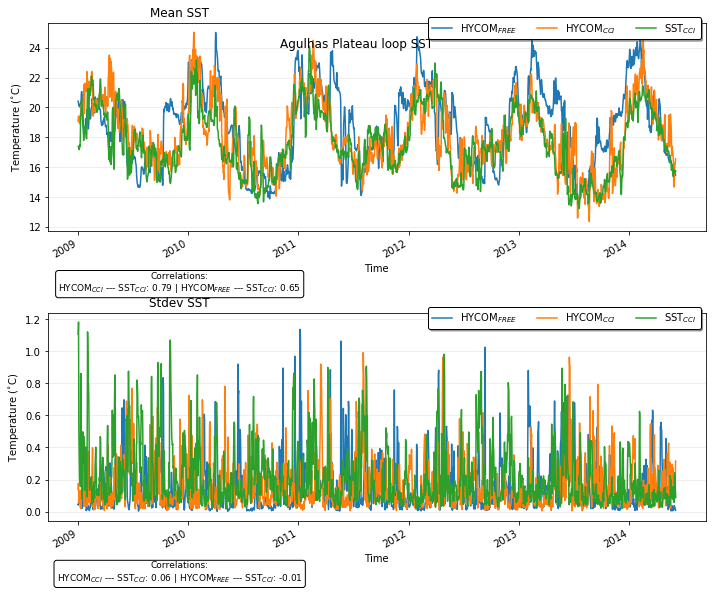

In [210]:
mean_corr_ccisst = round(np.corrcoef(apl_cci['temperature'][:,0],apl_sst['analysed_sst'])[0,1],2)
mean_corr_freesst = round(np.corrcoef(apl_free['temperature'][:,0],apl_sst['analysed_sst'])[0,1],2)

std_corr_ccisst = round(np.corrcoef(apl_cci_std['temperature'][:,0],apl_sst_std['analysed_sst'])[0,1],2)
std_corr_freesst = round(np.corrcoef(apl_free_std['temperature'][:,0],apl_sst_std['analysed_sst'])[0,1],2)

fig = plt.figure(figsize=(10,8.2))
fig.suptitle('Agulhas Plateau loop SST', y=0.93)

########################################################################################################################################################################
### Subplot 1: Plotting mean
########################################################################################################################################################################

ax1 = plt.subplot(2,1,1)

apl_free['temperature'].plot.line(x='time',label='HYCOM$_{FREE}$')
apl_cci['temperature'].plot.line(x='time',label='HYCOM$_{CCI}$')
apl_sst['analysed_sst'].plot.line(x='time',label='SST$_{CCI}$')
plt.title('Mean SST', x=0.2)
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Time')
ax1.grid(axis='y', alpha=0.25)
ax1.set_aspect('auto')

ax1textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_freesst)

ax1.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.05), ncol=3, fancybox=True, shadow=True)
ax1.text(0.2, -0.25, ax1textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=ax1.transAxes, bbox = dict(boxstyle='round', facecolor='white'))

########################################################################################################################################################################
### Subplot 2: Plotting standard deviation
########################################################################################################################################################################

ax2 = plt.subplot(2,1,2)

apl_free_std['temperature'].plot.line(x='time',label='HYCOM$_{FREE}$')
apl_cci_std['temperature'].plot.line(x='time',label='HYCOM$_{CCI}$')
apl_sst_std['analysed_sst'].plot.line(x='time',label='SST$_{CCI}$')
plt.title('Stdev SST', x=0.2)
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Time')
ax2.grid(axis='y', alpha=0.25)
ax2.set_aspect('auto')

ax2textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(std_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(std_corr_freesst)

ax2.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.05), ncol=3, fancybox=True, shadow=True)
ax2.text(0.2, -0.25, ax2textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=ax2.transAxes, bbox = dict(boxstyle='round', facecolor='white'))

plt.subplots_adjust(hspace=0.6)

plt.savefig('../Figures/sst/TimeSeries_AgulhasPlateauloop.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

#### Climatology

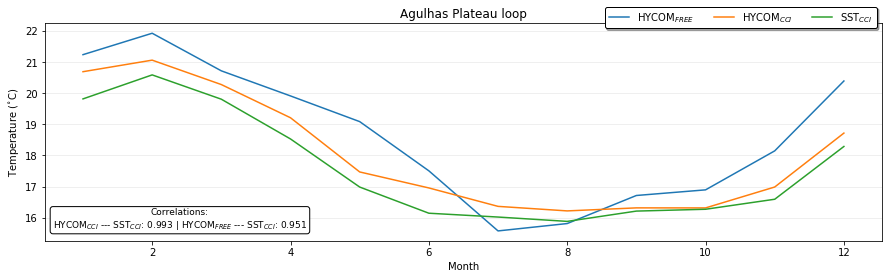

In [261]:
# # calculating correlations
mean_corr_ccisst = round(np.corrcoef(apl_cci_clima['temperature'][:,0],apl_sst_clima['analysed_sst'])[0,1],3)
mean_corr_ccifree = round(np.corrcoef(apl_cci_clima['temperature'][:,0],apl_free_clima['temperature'][:,0])[0,1],3)

fig = plt.figure(figsize=(15,4))
apl_free_clima['temperature'][:,0].plot.line(x='month',label='HYCOM$_{FREE}$')
apl_cci_clima['temperature'][:,0].plot.line(x='month',label='HYCOM$_{CCI}$')
apl_sst_clima['analysed_sst'].plot.line(x='month',label='SST$_{CCI}$')
plt.title('Agulhas Plateau loop')
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Month')
plt.grid(axis='y', alpha=0.25)

# textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: {0} | HYCOM$_{FREE}$ --- SST$_{CCI}$: {0}'.format(mean_corr_ccifree,mean_corr_ccifree)
textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccifree)

plt.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.1), ncol=3, fancybox=True, shadow=True)
fig.text(0.25, 0.2, textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=fig.transFigure, bbox = dict(boxstyle='round', facecolor='white'))
plt.savefig('../Figures/sst/TimeSeries_Climatology_AgulhasPlateauloop.png', dpi=300, bbox_inches='tight', format='png')

plt.show()

#### De-seasonalised / Anomalies

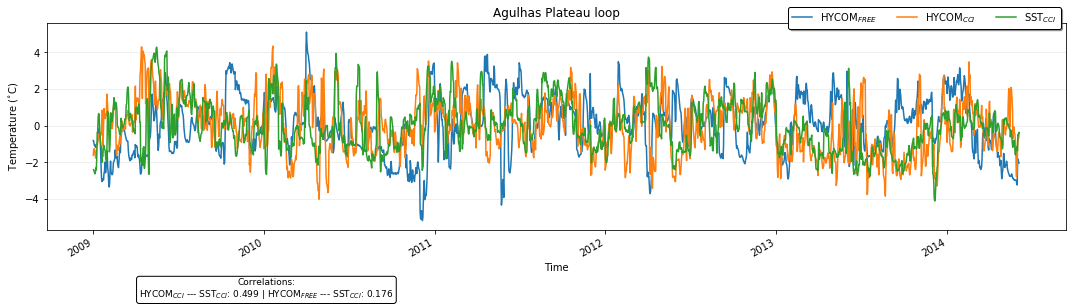

In [212]:
# calculating correlations
mean_corr_ccisst = round(np.corrcoef(apl_cci_deseasoned['temperature'][:,0],apl_sst_deseasoned['analysed_sst'])[0,1],3)
mean_corr_freesst = round(np.corrcoef(apl_free_deseasoned['temperature'][:,0],apl_sst_deseasoned['analysed_sst'])[0,1],3)

fig = plt.figure(figsize=(15,4))
apl_free_deseasoned['temperature'].plot.line(x='time',label='HYCOM$_{FREE}$')
apl_cci_deseasoned['temperature'].plot.line(x='time',label='HYCOM$_{CCI}$')
apl_sst_deseasoned['analysed_sst'].plot.line(x='time',label='SST$_{CCI}$')
plt.title('Agulhas Plateau loop')
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Time')
plt.grid(axis='y', alpha=0.25)

textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_freesst)
fig.text(0.25, -0.02, textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=fig.transFigure, bbox = dict(boxstyle='round', facecolor='white'))
plt.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.1), ncol=3, fancybox=True, shadow=True)

plt.savefig('../Figures/sst/TimeSeries_AgulhasPlateauloop_deseasoned.png', dpi=300, bbox_inches='tight', format='png')

plt.plot()
plt.tight_layout()

#### De-seasonalised scatter plot

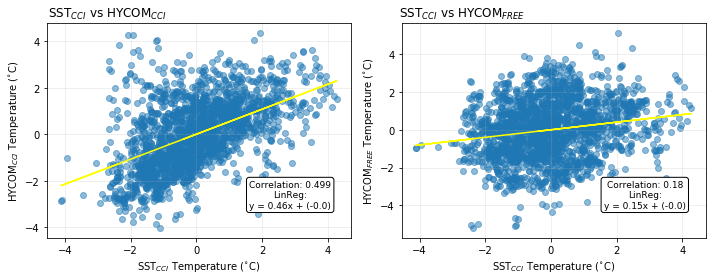

In [214]:
#_________________________________________________________________________________________________________________________________________
# calculating correlations and regressions

mean_corr_deseasoned_ccisst = round(np.corrcoef(apl_cci_deseasoned['temperature'][:,0],apl_sst_deseasoned['analysed_sst'])[0,1],2)
mean_corr_freesst = round(np.corrcoef(apl_free_deseasoned['temperature'][:,0],apl_sst_deseasoned['analysed_sst'])[0,1],2)

regress1 = stats.linregress(apl_cci_deseasoned['temperature'][:,0], apl_sst_deseasoned['analysed_sst'])
round(regress1.slope, 2)
round(regress1.intercept, 2)

regress2 = stats.linregress(apl_free_deseasoned['temperature'][:,0], apl_sst_deseasoned['analysed_sst'])
round(regress2.slope, 2)
round(regress2.intercept, 2)
#_________________________________________________________________________________________________________________________________________


fig = plt.figure(figsize=(10,4))
# fig.title('Hondeklip Bay inshore SST', y=0.93)

########################################################################################################################################################################
### Subplot 1: Plotting HYCOM_cci vs SST_cci
########################################################################################################################################################################

ax1 = plt.subplot(1,2,1)

b1, m1 = polyfit(apl_sst_deseasoned['analysed_sst'], apl_cci_deseasoned['temperature'], 1)

plt.scatter(apl_sst_deseasoned['analysed_sst'],apl_cci_deseasoned['temperature'], alpha=0.5)
plt.plot(apl_sst_deseasoned['analysed_sst'], b1 + m1 * apl_sst_deseasoned['analysed_sst'], '-', color='yellow')
plt.title('SST$_{CCI}$ vs HYCOM$_{CCI}$', x=0.2)
plt.xlabel('SST$_{CCI}$ Temperature ($^{\circ}$C)')
plt.ylabel('HYCOM$_{CCI}$ Temperature ($^{\circ}$C)')
ax1.grid(axis='both', alpha=0.25)

ax1textbox = 'Correlation: {0}'.format(mean_corr_ccisst) + '\nLinReg:\ny = {0}'.format(round(regress1.slope, 2)) + 'x + ({0})'.format(round(regress1.intercept, 2))
ax1.text(0.8, 0.2, ax1textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=ax1.transAxes, bbox = dict(boxstyle='round', facecolor='white'))

########################################################################################################################################################################
### Subplot 2: Plotting HYCOM_free vs SST_cci
########################################################################################################################################################################

ax2 = plt.subplot(1,2,2)

b2, m2 = polyfit(apl_sst_deseasoned['analysed_sst'], apl_free_deseasoned['temperature'], 1)

plt.scatter(apl_sst_deseasoned['analysed_sst'],apl_free_deseasoned['temperature'], alpha=0.5)
plt.plot(apl_sst_deseasoned['analysed_sst'], b2 + m2 * apl_sst_deseasoned['analysed_sst'], '-', color='yellow')
plt.title('SST$_{CCI}$ vs HYCOM$_{FREE}$', x=0.2)
plt.xlabel('SST$_{CCI}$ Temperature ($^{\circ}$C)')
plt.ylabel('HYCOM$_{FREE}$ Temperature ($^{\circ}$C)')
ax2.grid(axis='both', alpha=0.25)

ax2textbox = 'Correlation: {0}'.format(mean_corr_freesst) + '\nLinReg:\ny = {0}'.format(round(regress2.slope, 2)) + 'x + ({0})'.format(round(regress2.intercept, 2))
ax2.text(0.8, 0.2, ax2textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=ax2.transAxes, bbox = dict(boxstyle='round', facecolor='white'))

plt.subplots_adjust(hspace=0.6)

plt.savefig('../Figures/sst/Scatter_AgulhasPlateauloop.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

### Agulhas Bank

#### Including seasonal signal

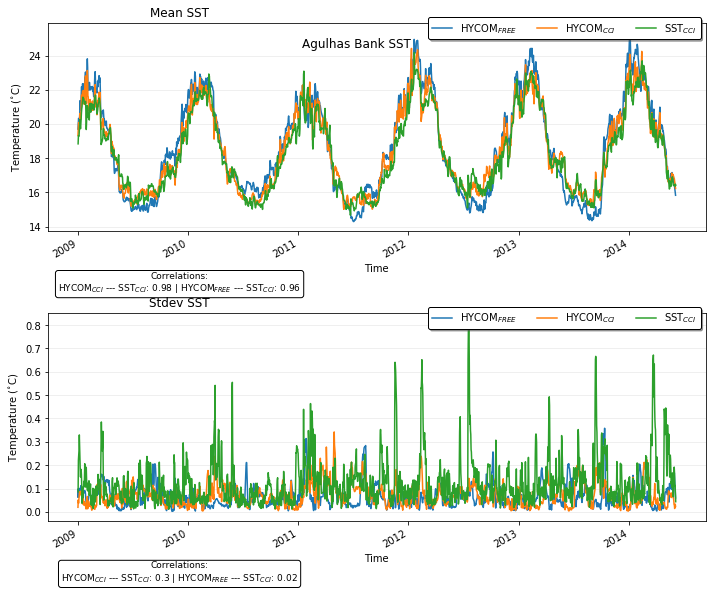

In [216]:
mean_corr_ccisst = round(np.corrcoef(aba_cci['temperature'][:,0],aba_sst['analysed_sst'])[0,1],2)
mean_corr_freesst = round(np.corrcoef(aba_free['temperature'][:,0],aba_sst['analysed_sst'])[0,1],2)

std_corr_ccisst = round(np.corrcoef(aba_cci_std['temperature'][:,0],aba_sst_std['analysed_sst'])[0,1],2)
std_corr_freesst = round(np.corrcoef(aba_free_std['temperature'][:,0],aba_sst_std['analysed_sst'])[0,1],2)

fig = plt.figure(figsize=(10,8.2))
fig.suptitle('Agulhas Bank SST', y=0.93)

########################################################################################################################################################################
### Subplot 1: Plotting mean
########################################################################################################################################################################

ax1 = plt.subplot(2,1,1)

aba_free['temperature'].plot.line(x='time',label='HYCOM$_{FREE}$')
aba_cci['temperature'].plot.line(x='time',label='HYCOM$_{CCI}$')
aba_sst['analysed_sst'].plot.line(x='time',label='SST$_{CCI}$')
plt.title('Mean SST', x=0.2)
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Time')
ax1.grid(axis='y', alpha=0.25)
ax1.set_aspect('auto')

ax1textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_freesst)

ax1.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.05), ncol=3, fancybox=True, shadow=True)
ax1.text(0.2, -0.25, ax1textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=ax1.transAxes, bbox = dict(boxstyle='round', facecolor='white'))

########################################################################################################################################################################
### Subplot 2: Plotting standard deviation
########################################################################################################################################################################

ax2 = plt.subplot(2,1,2)

aba_free_std['temperature'].plot.line(x='time',label='HYCOM$_{FREE}$')
aba_cci_std['temperature'].plot.line(x='time',label='HYCOM$_{CCI}$')
aba_sst_std['analysed_sst'].plot.line(x='time',label='SST$_{CCI}$')
plt.title('Stdev SST', x=0.2)
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Time')
ax2.grid(axis='y', alpha=0.25)
ax2.set_aspect('auto')

ax2textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(std_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(std_corr_freesst)

ax2.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.05), ncol=3, fancybox=True, shadow=True)
ax2.text(0.2, -0.25, ax2textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=ax2.transAxes, bbox = dict(boxstyle='round', facecolor='white'))

plt.subplots_adjust(hspace=0.6)

plt.savefig('../Figures/sst/TimeSeries_AgulhasBank.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

#### Climatology

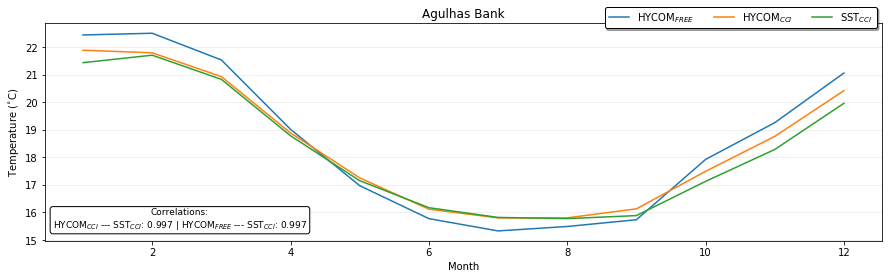

In [263]:
# # calculating correlations
mean_corr_ccisst = round(np.corrcoef(aba_cci_clima['temperature'][:,0],aba_sst_clima['analysed_sst'])[0,1],3)
mean_corr_ccifree = round(np.corrcoef(aba_cci_clima['temperature'][:,0],aba_free_clima['temperature'][:,0])[0,1],3)

fig = plt.figure(figsize=(15,4))
aba_free_clima['temperature'][:,0].plot.line(x='month',label='HYCOM$_{FREE}$')
aba_cci_clima['temperature'][:,0].plot.line(x='month',label='HYCOM$_{CCI}$')
aba_sst_clima['analysed_sst'].plot.line(x='month',label='SST$_{CCI}$')
plt.title('Agulhas Bank')
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Month')
plt.grid(axis='y', alpha=0.25)

# textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: {0} | HYCOM$_{FREE}$ --- SST$_{CCI}$: {0}'.format(mean_corr_ccifree,mean_corr_ccifree)
textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccifree)

plt.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.1), ncol=3, fancybox=True, shadow=True)
fig.text(0.25, 0.2, textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=fig.transFigure, bbox = dict(boxstyle='round', facecolor='white'))
plt.savefig('../Figures/sst/TimeSeries_Climatology_AgulhasBank.png', dpi=300, bbox_inches='tight', format='png')

plt.show()

#### De-seasonalised / Anomalies

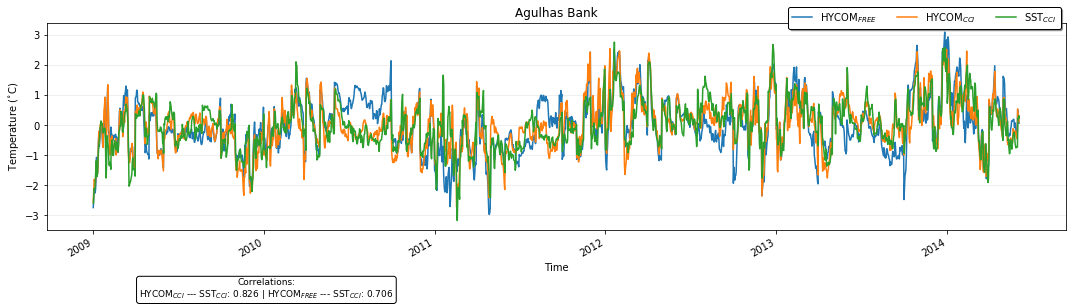

In [218]:
# calculating correlations
mean_corr_ccisst = round(np.corrcoef(aba_cci_deseasoned['temperature'][:,0],aba_sst_deseasoned['analysed_sst'])[0,1],3)
mean_corr_freesst = round(np.corrcoef(aba_free_deseasoned['temperature'][:,0],aba_sst_deseasoned['analysed_sst'])[0,1],3)

fig = plt.figure(figsize=(15,4))
aba_free_deseasoned['temperature'].plot.line(x='time',label='HYCOM$_{FREE}$')
aba_cci_deseasoned['temperature'].plot.line(x='time',label='HYCOM$_{CCI}$')
aba_sst_deseasoned['analysed_sst'].plot.line(x='time',label='SST$_{CCI}$')
plt.title('Agulhas Bank')
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Time')
plt.grid(axis='y', alpha=0.25)

textbox = 'Correlations:\nHYCOM$_{CCI}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_ccisst) + ' | HYCOM$_{FREE}$ --- SST$_{CCI}$: ' + '{0}'.format(mean_corr_freesst)
fig.text(0.25, -0.02, textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=fig.transFigure, bbox = dict(boxstyle='round', facecolor='white'))
plt.legend(edgecolor='k',loc='upper right', bbox_to_anchor=(1.0, 1.1), ncol=3, fancybox=True, shadow=True)

plt.savefig('../Figures/sst/TimeSeries_AgulhasBank_deseasoned.png', dpi=300, bbox_inches='tight', format='png')

plt.plot()
plt.tight_layout()

#### De-seasonalised scatter plot

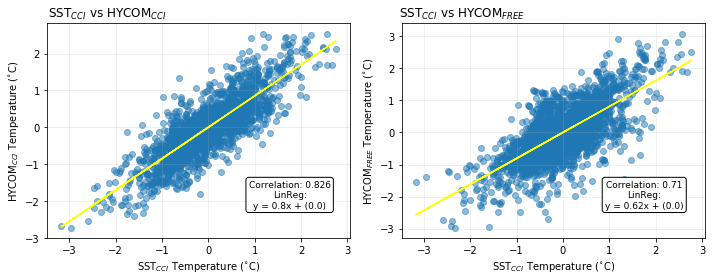

In [220]:
#_________________________________________________________________________________________________________________________________________
# calculating correlations and regressions

mean_corr_deseasoned_ccisst = round(np.corrcoef(aba_cci_deseasoned['temperature'][:,0],aba_sst_deseasoned['analysed_sst'])[0,1],2)
mean_corr_freesst = round(np.corrcoef(aba_free_deseasoned['temperature'][:,0],aba_sst_deseasoned['analysed_sst'])[0,1],2)

regress1 = stats.linregress(aba_cci_deseasoned['temperature'][:,0], aba_sst_deseasoned['analysed_sst'])
round(regress1.slope, 2)
round(regress1.intercept, 2)

regress2 = stats.linregress(aba_free_deseasoned['temperature'][:,0], aba_sst_deseasoned['analysed_sst'])
round(regress2.slope, 2)
round(regress2.intercept, 2)
#_________________________________________________________________________________________________________________________________________


fig = plt.figure(figsize=(10,4))
# fig.title('Hondeklip Bay inshore SST', y=0.93)

########################################################################################################################################################################
### Subplot 1: Plotting HYCOM_cci vs SST_cci
########################################################################################################################################################################

ax1 = plt.subplot(1,2,1)

b1, m1 = polyfit(aba_sst_deseasoned['analysed_sst'], aba_cci_deseasoned['temperature'], 1)

plt.scatter(aba_sst_deseasoned['analysed_sst'],aba_cci_deseasoned['temperature'], alpha=0.5)
plt.plot(aba_sst_deseasoned['analysed_sst'], b1 + m1 * aba_sst_deseasoned['analysed_sst'], '-', color='yellow')
plt.title('SST$_{CCI}$ vs HYCOM$_{CCI}$', x=0.2)
plt.xlabel('SST$_{CCI}$ Temperature ($^{\circ}$C)')
plt.ylabel('HYCOM$_{CCI}$ Temperature ($^{\circ}$C)')
ax1.grid(axis='both', alpha=0.25)

ax1textbox = 'Correlation: {0}'.format(mean_corr_ccisst) + '\nLinReg:\ny = {0}'.format(round(regress1.slope, 2)) + 'x + ({0})'.format(round(regress1.intercept, 2))
ax1.text(0.8, 0.2, ax1textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=ax1.transAxes, bbox = dict(boxstyle='round', facecolor='white'))

########################################################################################################################################################################
### Subplot 2: Plotting HYCOM_free vs SST_cci
########################################################################################################################################################################

ax2 = plt.subplot(1,2,2)

b2, m2 = polyfit(aba_sst_deseasoned['analysed_sst'], aba_free_deseasoned['temperature'], 1)

plt.scatter(aba_sst_deseasoned['analysed_sst'],aba_free_deseasoned['temperature'], alpha=0.5)
plt.plot(aba_sst_deseasoned['analysed_sst'], b2 + m2 * aba_sst_deseasoned['analysed_sst'], '-', color='yellow')
plt.title('SST$_{CCI}$ vs HYCOM$_{FREE}$', x=0.2)
plt.xlabel('SST$_{CCI}$ Temperature ($^{\circ}$C)')
plt.ylabel('HYCOM$_{FREE}$ Temperature ($^{\circ}$C)')
ax2.grid(axis='both', alpha=0.25)

ax2textbox = 'Correlation: {0}'.format(mean_corr_freesst) + '\nLinReg:\ny = {0}'.format(round(regress2.slope, 2)) + 'x + ({0})'.format(round(regress2.intercept, 2))
ax2.text(0.8, 0.2, ax2textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=ax2.transAxes, bbox = dict(boxstyle='round', facecolor='white'))

plt.subplots_adjust(hspace=0.6)

plt.savefig('../Figures/sst/Scatter_AgulhasBank.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## HYCOM<sub>FREE</sub>

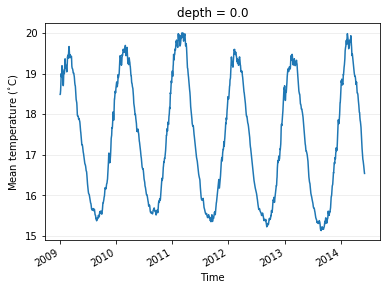

In [15]:
ds_free_timeseries['temperature'].plot()
plt.ylabel('Mean temperature ($^{\circ}$C)')
plt.xlabel('Time')
plt.grid(axis='y', alpha=0.25)

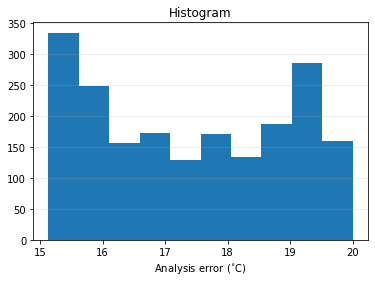

In [21]:
ds_free_timeseries['temperature'].plot.hist()
plt.xlabel('Analysis error ($^{\circ}$C)')
plt.grid(axis='y', alpha=0.25)

In [19]:
CCI.analysis_uncertainty.isel(lon=11, lat=-17).plot.line(x='time', label='Namibia')
CCI.analysis_uncertainty.isel(lon=37, lat=-39).plot.line(x='time', label='Offhsore Indian')
CCI.analysis_uncertainty.isel(lon=21, lat=-41).plot.line(x='time', label='Retroflection')
plt.ylabel('Analysis error ($^{\circ}$C)')
plt.xlabel('Time')
plt.grid(axis='y', alpha=0.25)
plt.legend()

NameError: name 'CCI' is not defined

## HYCOM<sub>CCI</sub>

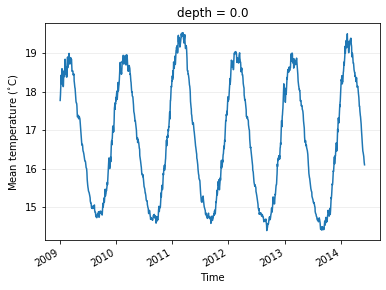

In [20]:
ds_cci_timeseries['temperature'].plot()
plt.ylabel('Mean temperature ($^{\circ}$C)')
plt.xlabel('Time')
plt.grid(axis='y', alpha=0.25)

#### Rolling mean test

In [41]:
# create rolling mean
# ds_cci_timeseries['temperature']

# cci_temp_rolling = ds_cci.rolling(time=365, center=True).mean(dim=('longitude','latitude'), skipna=True)
cci_temp_rolling = ds_cci_timeseries['temperature'].rolling(time=365, center=True).mean()
cci_temp_anomalies = ds_cci_timeseries['temperature'] - cci_temp_rolling

In [39]:
cci_temp_rolling

<xarray.DataArray (time: 1981, depth: 1)>
array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2009-01-01 2009-01-02 ... 2014-06-04
  * depth    (depth) float32 0.0

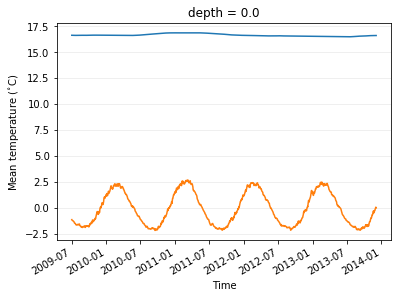

In [44]:
# cci_temp_rolling = ds_cci_timeseries['temperature'].rolling(time=365, center=True)
cci_temp_rolling.plot()
cci_temp_anomalies.plot()
plt.ylabel('Mean temperature ($^{\circ}$C)')
plt.xlabel('Time')
plt.grid(axis='y', alpha=0.25)

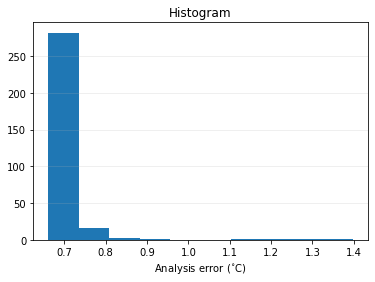

In [45]:
OSTIA_timeseries.plot.hist()
plt.xlabel('Analysis error ($^{\circ}$C)')
plt.grid(axis='y', alpha=0.25)

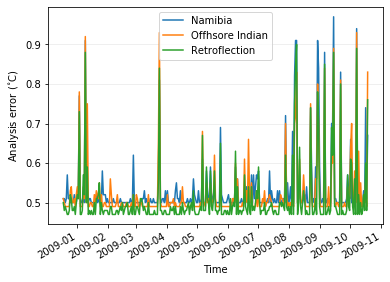

In [46]:
OSTIA.analysis_error.isel(lon=11, lat=-17).plot.line(x='time', label='Namibia')
OSTIA.analysis_error.isel(lon=37, lat=-39).plot.line(x='time', label='Offhsore Indian')
OSTIA.analysis_error.isel(lon=21, lat=-41).plot.line(x='time', label='Retroflection')
plt.ylabel('Analysis error ($^{\circ}$C)')
plt.xlabel('Time')
plt.grid(axis='y', alpha=0.25)
plt.legend()

## CCI vs OSTIA

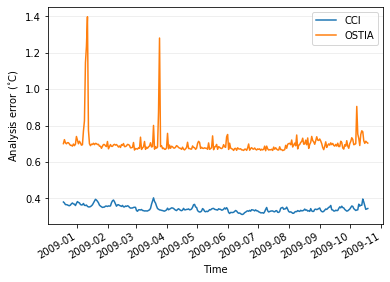

In [6]:
CCI_timeseries.plot(label='CCI')
OSTIA_timeseries.plot(label='OSTIA')
plt.ylabel('Analysis error ($^{\circ}$C)')
plt.xlabel('Time')
plt.grid(axis='y', alpha=0.25)
plt.legend()
plt.savefig('CCIvsOSTIA_timeseries.png', dpi=300, bbox_inches='tight', format='png')

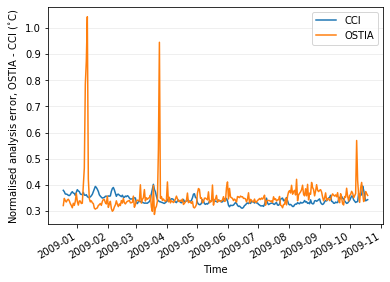

In [7]:
CCI_timeseries.plot(label='CCI')
Normalised_OSTIA.plot(label='OSTIA')
plt.ylabel('Normalised analysis error, OSTIA - CCI ($^{\circ}$C)')
plt.xlabel('Time')
plt.grid(axis='y', alpha=0.25)
plt.legend()

In [18]:
xr.decode_cf(CCI)

<xarray.Dataset>
Dimensions:               (lat: 801, lon: 1200, time: 305)
Coordinates:
  * time                  (time) datetime64[ns] 2008-12-18T12:00:00 ... 2009-10-18T12:00:00
  * lat                   (lat) float32 -50.025 -49.975 ... -10.075 -10.025
  * lon                   (lon) float32 0.025 0.075 0.125 ... 59.925 59.975
Data variables:
    analysis_uncertainty  (time, lat, lon) float32 ...
Attributes:
    Conventions:                     CF-1.5, Unidata Observation Dataset v1.0
    title:                           ESA SST CCI OSTIA L4 product
    summary:                         OSTIA L4 product from the ESA SST CCI pr...
    references:                      http://www.esa-sst-cci.org
    institution:                     ESACCI
    history:                         Created using OSTIA reanalysis system v3.0
    comment:                         These data were produced at the Met Offi...
    license:                         Creative Commons Licence by attribution ...
    id:  